![Logo 01](https://staff.utia.cas.cz/novozada/Jadro/jadro01_poster.png)

**Workshop website:** [https://zoi.utia.cas.cz/jadro](https://zoi.utia.cas.cz/jadro)


# Part 0: Imports Packages & Data & Helper Functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import requests
import zipfile
import os
import errno
import cv2 as cv
# For showing the images in Colab use wrap function cv2_imshow
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import time
import glob
import itertools
from IPython import display
import warnings
warnings.filterwarnings("ignore")

# Load the data form our server and their unpacking
filename = 'jadro01_data.zip'
url = f'http://staff.utia.cas.cz/novozada/Jadro/{filename}'
try:
    os.mkdir(f'{filename[:-4]}')
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
    else:
        print(f'{filename[:-4]} folder already exists!')

# Resize image evenly by height
def resize(img, height=200, interpolation=cv.INTER_CUBIC):
  scale = height / img.shape[0]
  width = int(img.shape[1] * scale)
  new_size = (width, height)
  return cv.resize(img, new_size, interpolation = interpolation)

# Show image with height
def show(img, height=200, interpolation=cv.INTER_CUBIC):
  img_new = resize(img, height, interpolation = interpolation)
  cv2_imshow(img_new)

# Show more image in one line
def show_more(height, *args):
    img_new = cv.hconcat([resize(img, height).astype(float) for img in args])
    cv2_imshow(img_new)

# Read all files from folder
def getFilenames(exts):
    fnames = [glob.glob(ext) for ext in exts]
    fnames = list(itertools.chain.from_iterable(fnames))
    fnames.sort()
    return fnames

jadro01_data folder already exists!


# Part 1: Prerequisites

## 1.1: Colab




<a href="https://colab.research.google.com/"><img src="https://staff.utia.cas.cz/novozada/ml1/colab_logo.png"
 align="right"  width="150px"></a>There are several benefits of using Colab over using your own local machines:

* You do not require to do an [environment setup](https://docs.conda.io/projects/conda/en/latest/index.html).
* Browser-based [Jupyter Notebooks](https://jupyter.org/) with important [packages](https://pypi.org/) pre-installed
* Document code with [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb)
* Load Data from (and save to) [Local Drive and Google Drive](https://colab.research.google.com/notebooks/io.ipynb)
* Importing [Notebooks from Github](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#scrollTo=K-NVg7RjyeTk)
* [Sharing](https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm) with others
* [Free GPU](https://www.tutorialspoint.com/google_colab/google_colab_using_free_gpu.htm) (not needed at the exercises)

[How to use colab](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

[Check one of the many youtube tutorials.](https://www.youtube.com/watch?v=RLYoEyIHL6A)

[A Complete guide to Google Colab for Deep Learning](https://www.kdnuggets.com/2020/06/google-colab-deep-learning.html)

[Advanced Google Colab Tips](https://amitness.com/2020/06/google-colaboratory-tips/)


## 1.2: Python Crash Course


*   high-level, object-oriented, general purpose programming language
*   open source (free to use and distribute, including for commercial purposes)
*   interpreted (no need to compile the code)
*   simple-to-learn syntax and excellent readability
*   large community
*   numerous libraries for scientific computing

**You should know**
* [Python code structure, variables, functions, conditions, loops](https://coobas.gitlab.io/python-fjfi/en/posts/zakladni-syntaxe.html)
* [Containers: tuple, list, set, dict](https://coobas.gitlab.io/python-fjfi/en/posts/kontejnery.html)
* [Object oriented programming](https://coobas.gitlab.io/python-fjfi/en/posts/objektove-orientovane-programovani.html)
* Packages: [Numpy](https://coobas.gitlab.io/python-fjfi/en/posts/zaklady-numpy.html), [Matplotlib](https://coobas.gitlab.io/python-fjfi/posts/matplotlib.html)

**Learn Python**
* [Introduction to Python](https://pythonprogramming.net/introduction-learn-python-3-tutorials/)
* [Intermediate Python Programming introduction](https://pythonprogramming.net/introduction-intermediate-python-tutorial/)
* [Python cheat sheet](https://websitesetup.org/wp-content/uploads/2021/04/Python-cheat-sheet-April-2021.pdf)
* [Sharpen your python skills on CodeWars](https://www.codewars.com)

**Basic reference sheet**
* [HERE](http://staff.utia.cas.cz/novozada/ML/python3_reference_sheet.pdf)


#### Variable assignment and basic operations

assign number $ 4 $ to variable $ x $ and print the value of $ x $:

In [ ]:
x = 4
print(x)


4


print the type of variable $ x $ using the [`type`](https://docs.python.org/3/library/functions.html#type) function:

In [ ]:
type(x)

int

single-line comments:

In [ ]:
# this is a single-line comment

assign number $ 2 $ to variable $ a $, assign number $ 4 $ to variable $ b $, and print sum, difference, product, and quotient of both variables:

In [ ]:
a = 2
b = 4
print(a + b, a - b, a * b, a / b)

6 -2 8 0.5


assign number $ 2 $ to variable $ c $ and print square-root of $ c $ and $ c $ to the power of $ 2 $ using the `**` operator:

In [ ]:
c = 2
print(c**0.5, c**2)

1.4142135623730951 4


create a list $ l $ of $ 1 $, $ 2.0 $, $ 3 $, and $ c $ (lists can contain any type of variable) and print the content of $ l $:

In [ ]:
l = [1, 2.0, 3, "c"]
print(l)

[1, 2.0, 3, 'c']


### Conditions

check if $ x $ is equal to $ 4 $, check if $ x $ is not equal to $ 3 $ using the operators `==` and `!=`:

In [ ]:
print(x == 4, x != 3)

True True


check if $ x $ is greater than $ 1 $ and less than $ 3 $, check if $ x $ is equal to $ 3 $ or $ 4 $ using the operators `and` and `or`:

In [ ]:
print(x > 1 and x < 3, x == 3 or x == 4)

False True


if the value of variable $ x $ is less than or equal to $ 3 $, print "x <= 3", if the value of variable $ x $ is greater than $ 3 $ and less than $ 5 $, print "3 < x < 5", else print "x >= 5" using the [`if`](https://docs.python.org/3/reference/compound_stmts.html#if), [`elif`](https://docs.python.org/3/reference/compound_stmts.html#elif), and [`else`](https://docs.python.org/3/reference/compound_stmts.html#else) statements (note that in Python the code blocks must be indented - both tabs and spaces are supported):

In [ ]:
if x <= 3:
    print("x <= 3")
elif x > 3 and x < 5:
    print("3 < x < 5")
else:
    print("x >= 5")

3 < x < 5


use the `in` operator to check if the list $ l $ contains character $ c $:

In [ ]:
print(l)
print("c" in l)

[1, 2.0, 3, 'c']
True


use the `in` and `not` operators to check if the number 4 is not in the list $ l $:

In [ ]:
print(4 not in l)

True


### Loops

print the sequence of numbers from 0 to 2 using the [`range`](https://docs.python.org/3/library/stdtypes.html#range) function and [`for`](https://docs.python.org/3/reference/compound_stmts.html#the-for-statement) loop (note that the [`range`](https://docs.python.org/3/library/stdtypes.html#range) function is zero based):

In [ ]:
for i in range(3):
    print(i)

0
1
2


print the sequence of numbers from $ 3 $ to $ 5 $:

In [ ]:
for i in range(3, 6):
    print(i)

3
4
5


iterate over a sequence given by list:

In [ ]:
for x in [1,5,4]:
    print(x)

1
5
4


[`while`](https://docs.python.org/3/reference/compound_stmts.html#while) loops repeat as long as a certain boolean condition is met (note that the [`else`](https://docs.python.org/3/reference/compound_stmts.html#else) clause can be used in loops):

In [ ]:
k = 10
while k > 5:
    print("k =", k)
    k = k - 1 # or k -= 1
else:
    print("k <= 5")

k = 10
k = 9
k = 8
k = 7
k = 6
k <= 5


### Functions

define a function that takes two numbers and returns their product using the `def` keyword:

In [ ]:
def multiply(x, y):
    return x*y

print(multiply(2, 415))

830


use the [`try`](https://docs.python.org/3/reference/compound_stmts.html#try) and [`except`](https://docs.python.org/3/reference/compound_stmts.html#except) statements to catch the error thrown by `multiply` function when multiplying two strings:

In [ ]:
try:
    print(multiply("a", "b"))

except Exception as e:
    print("Caught an exception: " + str(e))

Caught an exception: can't multiply sequence by non-int of type 'str'


redefine the `multiply` function using the `lambda` keyword:

In [ ]:
multiply = lambda x, y: x**y

multiply(2, 3)

8

### 1.2.1 Python packages

#### **Numpy**
<a href="https://numpy.org/"><img src="https://staff.utia.cas.cz/novozada/ml1/numpy.png"
 align="right"  width="150px"></a>

* **Performance:** NumPy provides highly efficient operations on large arrays and matrices, often outperforming standard Python lists due to its use of optimized C code.

* **Convenience:** It simplifies complex mathematical calculations and operations with a vast library of mathematical functions.

* **Integration:** NumPy seamlessly integrates with other scientific computing and data analysis libraries such as SciPy, Pandas, and Matplotlib.

* **Broad Functionality:** It supports a wide range of operations, including linear algebra, random number generation, Fourier transforms, and more.

* **Memory Efficiency:** NumPy arrays consume less memory and provide a more efficient way to store and manipulate large datasets.


Import the [`numpy`](https://numpy.org/) module and bind the import to the local variable `np` (to avoid name collisions and shorten module name):

In [ ]:
import numpy as np

print $ \sqrt{4} $, $ \left|-1 \right| $, $ \exp{(1)} $, $ \ln{(e)} $, $ \sin{(\pi)}$, and $ \cos{(\pi)} $ using the functions from [`numpy`](https://numpy.org/) module:

In [ ]:
print(np.sqrt(4), np.abs(-1), np.exp(1), np.log(np.e), np.sin(np.pi), np.cos(np.pi))

2.0 1 2.718281828459045 1.0 1.2246467991473532e-16 -1.0


create a vector $ v $ of numbers from $ 1 $ to $ 9 $ using the [`array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function:

In [ ]:
v = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(v)
print([x**2 for x in v])

[1 2 3 4 5 6 7 8 9]
[1, 4, 9, 16, 25, 36, 49, 64, 81]


create a $ 3 \times 3 $ matrix $ \mathbb{M} $ of numbers from $ 1 $ to $ 9 $ using the [`array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function:

In [ ]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(M)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


print the dimensions of the vector $ v $ and matrix $ \mathbb{M} $ using the [`shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) function:

In [ ]:
print(np.shape(v), np.shape(M))

(9,) (3, 3)


print number of elements of the vector $ v $ and matrix $ \mathbb{M} $ using the [`size`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html) function:

In [ ]:
print(np.size(v), np.size(M))

9 9


print the scalar product $ v \cdot v $ using the [`dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) function (compare with the element-wise multiplication using the operator `*`):

In [ ]:
print(np.dot(v, v)) # alternatively v @ v
print(v * v)

285
[ 1  4  9 16 25 36 49 64 81]


print the matrix product $ \mathbb{M} \cdot \mathbb{M} $ using the [`dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) function (compare with the element-wise multiplication using the operator `*`):

In [ ]:
print(np.dot(M, M))# alternatively M @ M
print(M * M)

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


print the first, last, and the sixth element of vector $ v $:

In [ ]:
print(v)
print(v[0], v[-1], v[5], v[-2])

[1 2 3 4 5 6 7 8 9]
1 9 6 8


print the first five, last four, and each second element of vector $ v $ using the numpy array [indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html):

In [ ]:
print(v[:5], v[5:], v[::2])

[1 2 3 4 5] [6 7 8 9] [1 3 5 7 9]


print the $ \mathbb{M}_{0, 0} $ element, the first row, and the second column of matrix $ \mathbb{M} $:

In [ ]:
print(M[0, 0], M[0, :], M[:, 1])

1 [1 2 3] [2 5 8]


create evenly spaced vector $ x $ of size $ 5 $ from $ -2 $ to $ 2 $ using the [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function

In [ ]:
x = np.linspace(-2, 2, 5)
print(x)

[-2. -1.  0.  1.  2.]


create evenly spaced vector $ x $ of size $ 5 $ from $ -2 $ to $ 2 $ using the [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function and print the step size:

In [ ]:
x, h = np.linspace(-2, 2, 50, retstep=True)
print(h)

0.08163265306122448


create evenly spaced vector $ x $ from $ -2 $ to $ 2 $ with a step of size $ 1 $ using the [`arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) function:

In [ ]:
x = np.arange(-2, 3, 1.0)
print(x)

[-2. -1.  0.  1.  2.]


create a matrix from the vector $ x $ using the [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function:

In [ ]:
xx, yy = np.meshgrid(x, x)
print(xx)
print(yy)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]


create a vector of zeros of size $ 3 $ using the [`zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) function:

In [ ]:
z = np.zeros(3)
print(z)

[0. 0. 0.]


create a $ 3 \times 3$ matrix of zeros using the [`zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) function:

In [ ]:
Z = np.zeros((3, 3))
print(Z)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


create a $ 3 \times 3 $ matrix with ones on the diagonal and zeros elsewhere using the [`eye`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) function:

In [ ]:
D = np.eye(3)
print(D)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


create a $ 3 \times 3 $ matrix filled with ones using the [`ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) function:

In [ ]:
O = np.ones((3, 3))
print(O)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


create a $ 3 \times 3 $ matrix filled with random floating point numbers between $ 0 $ and $ 1 $ using the [`rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) function:

In [ ]:
R = np.random.rand(3, 3)
print(R)

[[0.16010702 0.89108462 0.07845209]
 [0.86917385 0.89122905 0.88288532]
 [0.2792226  0.370968   0.99958285]]


create a $ 3 \times 3 $ matrix with the vector $ (1, 2, 3) $ on the diagonal using the [`diag`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) function:

In [ ]:
print(np.diag([1,2,3], 0))

[[1 0 0]
 [0 2 0]
 [0 0 3]]


extract the main diagonal, and the diagonals above and below the main diagonal from matrix $ \mathbb{M} $ using the [`diag`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) function:

In [ ]:
print(np.diag(M, 0), np.diag(M, 1), np.diag(M, -1))

[1 5 9] [2 6] [4 8]


set all elements of matrix $ \mathbb{M} $ below and above diagonal to zero using the [`triu`](https://numpy.org/doc/stable/reference/generated/numpy.triu.html) and [`tril`](https://numpy.org/doc/stable/reference/generated/numpy.tril.html) functions:

In [ ]:
print(np.triu(M))
print(np.tril(M))

[[1 2 3]
 [0 5 6]
 [0 0 9]]
[[1 0 0]
 [4 5 0]
 [7 8 9]]


print minimum and maximum elements, index of minimum and maximum elements, and the sum of vector $ v $ using the [`min`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html), [`max`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html), [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), and [`sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) functions:

In [ ]:
print(np.min(v), np.max(v), np.argmin(v), np.argmax(v), np.sum(v))

1 9 0 8 45


print even numbers of vector $ v $ and their indices using the [`where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html), and [`mod`](https://numpy.org/doc/stable/reference/generated/numpy.mod.html) functions:

In [ ]:
print(v)
even = np.where(np.mod(v, 2) == 0)
print(v[even])

[1 2 3 4 5 6 7 8 9]
[2 4 6 8]


assign vector $ v $ to vector $ v_2 $ using the `=` operator (note that if you modify one in place, you'll see the change through the other one too):

In [ ]:
print(v)
v2 = v
v2[0] = -1
print(v)
print(v2)

[1 2 3 4 5 6 7 8 9]
[-1  2  3  4  5  6  7  8  9]
[-1  2  3  4  5  6  7  8  9]


copy the vector $ v $ to vector $ v_3 $ using the [`copy`](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) function:

In [ ]:
v3 = np.copy(v)
v3[0] = -2
print(v)
print(v3)

[-1  2  3  4  5  6  7  8  9]
[-2  2  3  4  5  6  7  8  9]


create vector $ v_4 $ by appending $ 0 $ to the end of vector $ v $ using the [`append`](https://numpy.org/doc/stable/reference/generated/numpy.append.html) function:

In [ ]:
v4 = np.append(v, 0)
print(v)
print(v4)

[-1  2  3  4  5  6  7  8  9]
[-1  2  3  4  5  6  7  8  9  0]


create vector $ v_5 $ by inserting $ -5 $ as a sixth element to vector $ v $ using the [`insert`](https://numpy.org/doc/stable/reference/generated/numpy.insert.html) function:

In [ ]:
v[5] = -123
print(v)
v5 = np.insert(v, 5, -5)
print(v5)

[  -1    2    3    4    5 -123    7    8    9]
[  -1    2    3    4    5   -5 -123    7    8    9]


create vector $ v_6 $ by concatenating vectors $ v_4 $ and $ v_5 $ using the [`concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function:

In [ ]:
v6 = np.concatenate((v4, v5))
print(v6)

[  -1    2    3    4    5    6    7    8    9    0   -1    2    3    4
    5   -5 -123    7    8    9]


create polynomial $ p = x^3 + 2x^2 + 3x + 2 $ using the [`poly1d`](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) function:

In [ ]:
p = np.poly1d([1, 2, 3, 2])
print(p)

   3     2
1 x + 2 x + 3 x + 2


Further reading: https://numpy.org/doc/stable/reference/

#### **Matplotlib**
<a href="https://numpy.org/"><img src="https://staff.utia.cas.cz/novozada/ml1/matplotlib.png"
 align="right"  width="150px"></a>

* **Versatility:** Matplotlib can create a wide range of static, animated, and interactive plots, including line charts, scatter plots, histograms, and 3D plots.

* **Customization:** It offers extensive options for customizing every aspect of a plot, from colors and labels to sizes and styles, allowing for highly detailed and tailored visualizations.

* **Integration:** Matplotlib integrates well with other libraries like NumPy, Pandas, and SciPy, making it a key component in the Python scientific stack.

* **Publication Quality:** It produces high-quality plots that are suitable for publication in scientific journals and professional presentations.

* **Community and Documentation:** It has a large and active user community, along with comprehensive documentation and numerous tutorials, making it easier to learn and troubleshoot.

Import [`pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) submodule from [`matplotlib`](https://matplotlib.org/) and bind the import to the local variable `plt`:

In [ ]:
import matplotlib.pyplot as plt

plot $ \sin{(x)} $ and $ \cos{(x)} $ functions for $ x \in [0, 10] $ using the [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function:

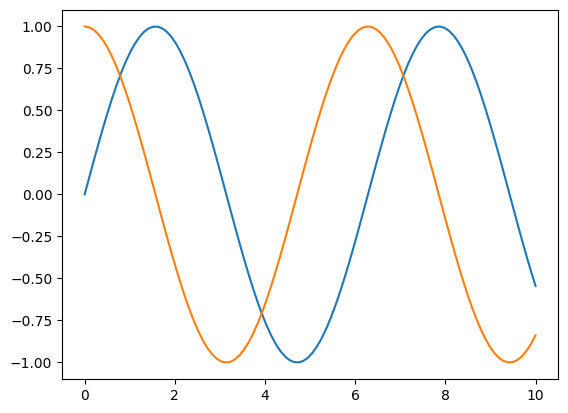

In [ ]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
plt.show()

plot the functions $ y(x) = x $ and $ y(x) = x^2 $ for $ x \in [0, 10] $ and show the plots next to each other:

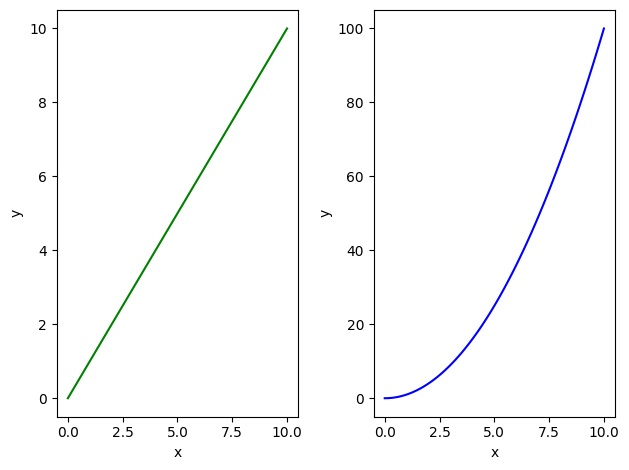

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x, x, color="green")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(x, x**2, color="blue")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

fig.tight_layout()
plt.show()

save the figure above as "figure.png":

In [ ]:
fig.savefig("figure.png", dpi=100)

create a 2D plot of Gaussian function, $ f(x, y) = \exp{(-ax^2 - by^2)} $, for $ x, y \in [-2, 2] $ using the [`pcolormesh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) function:

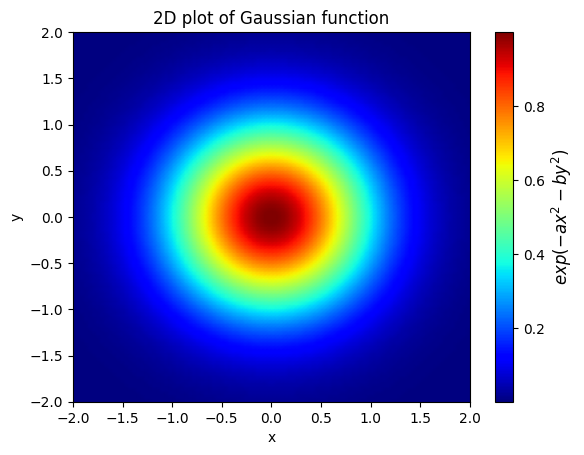

In [ ]:
a = 1 #@param {type:"slider", min:0, max:5, step:0.1}
b = 1 #@param {type:"slider", min:0, max:5, step:0.1}

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)
function = np.exp(-a*xx**2 - b*yy**2)

fig, ax = plt.subplots()
img = ax.pcolormesh(x, y, function, cmap="jet", shading="gouraud")
ax.set_title("2D plot of Gaussian function")
ax.set_xlabel("x")
ax.set_ylabel("y")

cbar = plt.colorbar(img)
cbar.set_label(label=r"$ exp(-ax^2 - by^2) $", fontsize=12)

plt.show()

Further reading: https://matplotlib.org/

#### **OpenCV**
<a href="https://numpy.org/"><img src="https://staff.utia.cas.cz/novozada/dizo/opencv.png"
 align="right"  width="100px"></a>

* **Comprehensive Library:** OpenCV provides a wide range of tools for image processing, computer vision, and machine learning, covering tasks like object detection, image transformation, and feature extraction.

* **Performance:** It is optimized for real-time applications, with many functions leveraging hardware acceleration, making it suitable for high-performance computer vision tasks.

* **Cross-Platform:** OpenCV is cross-platform, supporting Windows, Linux, macOS, Android, and iOS, which allows for the development of portable applications.

* **Integration:** It can be easily integrated with other libraries and frameworks such as NumPy, TensorFlow, and PyTorch, facilitating advanced AI and ML applications.

* **Extensive Community and Documentation:** OpenCV has a large, active community and extensive documentation, tutorials, and forums, which make it accessible for both beginners and experts in computer vision.

# Part 2: Basic Image Manipulation


## Reading + Showing + Saving Images

Load and show an image

Image Properties
- Number of Pixels: 786432
- Shape/Dimensions: (512, 512, 3)


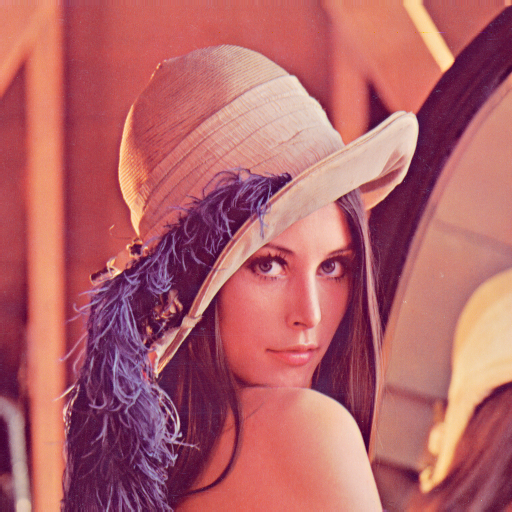

In [ ]:
# read the Image 'lena.
img = cv.imread('lena.png')
# print some basic properties of the image
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

cv2_imshow(img)

Too big? Use our help script for showing the image with different sizes.

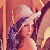

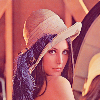

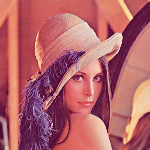

In [ ]:
for size in range(50, 200, 50):
  show(img,size)

Read, flip left to right and save the image

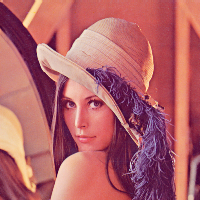

In [ ]:
# read the Image 'lena.
img = cv.imread('lena.png')
img_out = img[:,::-1]
cv.imwrite('lena_out.png', img_out)
show(img_out)

## Playing with Channels and Pixels  

### Work with color channels



Implementing the Max RGB filter
*   Split the image to the three channels
*   For each pixel find the maximum value of $r$, $g$, and $b: m = max(r, g, b)$    
*   If $g < m: g = 0$
*   If $r < m: r = 0$
*   If $b < m: b = 0$
*   Store the $r$, $g$, and $b$ values back in image: $I[x, y] = (r, g, b)$

Try with ***us163.png***

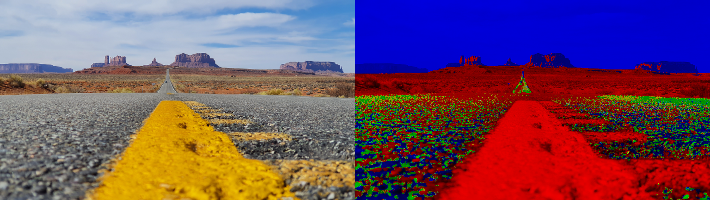

In [ ]:
def max_rgb_filter(img):
  # split channels
  b, g, r = cv.split(img)

  # find the maximum pixel intensity values for each pixel
  m = np.maximum(np.maximum(r, g), b)
  r[r < m] = 0
  g[g < m] = 0
  b[b < m] = 0
  # merge the channels back together and return the image
  return cv.merge([b, g, r])

img = cv.imread('us163.png')

show_more(200, img, max_rgb_filter(img))


### Work with pixels

*   Select the central rectangle $(m, n)$, where $m = height(I)/2$ and $n = width(I)/2$
*   Transform pixels inside the rectangle to grayscale
*   Double the value of even rows outside the rectangle

Try with ***lena.png***

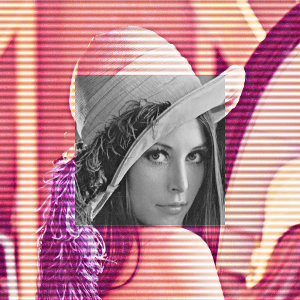

--- Processing: 0.1688528061 seconds ---


In [ ]:
img = cv.imread('lena.png')
h = img.shape[0]
w = img.shape[1]
start_time = time.time()
# get the central rectangle in grayscale
gray = cv.cvtColor(img[int(h/4):int(3*h/4), int(w/4):int(3*w/4)], cv.COLOR_BGR2GRAY)

# double the value
img[1::2]=cv.convertScaleAbs(img[1::2], alpha=2, beta=0)

# save the gray values to the central rectangle
img[int(h/4):int(3*h/4), int(w/4):int(3*w/4)] = cv.merge((gray, gray, gray))
show(img, 300)
print(f"--- Processing: {time.time() - start_time:.10f} seconds ---")

Increasing value - time comparison:

--- Processing: 22.4708199501 seconds ---
--- Processing: 0.0005383492 seconds ---


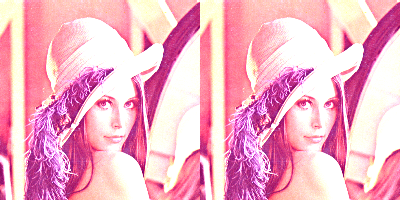

0

In [ ]:
img = cv.imread('lena.png')
h = img.shape[0]
w = img.shape[1]
channels = img.shape[2]
img_out = np.zeros(img.shape, img.dtype)
start_time = time.time()
for y in range(h):
    for x in range(w):
        for c in range(channels):
            img_out[y,x,c] = np.clip(2*img[y,x,c],0,255)
print(f"--- Processing: {time.time()-start_time:.10f} seconds ---")

start_time = time.time()
img_out2 = cv.convertScaleAbs(img, alpha=2, beta=0)
print(f"--- Processing: {time.time()-start_time:.10f} seconds ---")
show_more(200, img_out, img_out2)
np.max(img_out - img_out2)

An interesting difference in time consumption, huh?

**rgb2gray**

*   Write your own transformation from RGB image to Gray
*   Compare the speed with cv2.cvtColor()

Try with ***lena.png***

![RGB >> GRAY](https://staff.utia.cas.cz/novozada/dizo/rgb.png)

- np.dot: 0.029624 sec -
- handwritten: 0.005604 sec -
- cv.cvtColor: 0.001229 sec -
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0.2204 0.2204 0.2357]
 [0.2204 0.2204 0.2357]
 [0.2204 0.2204 0.2357]]


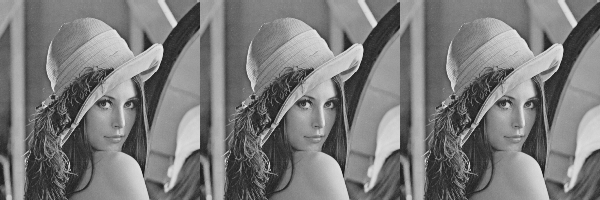

In [ ]:
img = cv.imread('lena.png')
b, g, r = cv.split(img)
# [r, g, b] coefficients
rgb_weights = [0.2989, 0.5870, 0.1140]
# dot product
stime = time.time()
gray0 = np.dot(img[...,::-1], rgb_weights)
print(f"- np.dot: {time.time() - stime:.6f} sec -")
# handwritten version
stime = time.time()
gray1 = r * rgb_weights[0] + g * rgb_weights[1] + b * rgb_weights[2]
print(f"- handwritten: {time.time() - stime:.6f} sec -")
stime = time.time()
gray2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(f"- cv.cvtColor: {time.time() - stime:.6f} sec -")
gg = (gray0 - gray1)
print((gg[0:3, 0:3]))
gg = (gray0 - gray2)
print((gg[0:3, 0:3]))
show_more(200, gray0, gray1, gray2)

### Work with matrix indexing

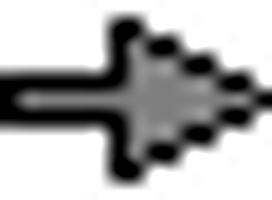

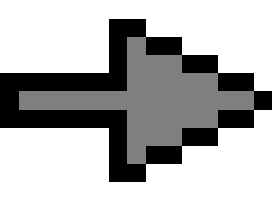

In [ ]:
img = cv.imread('sipka.png', cv.IMREAD_GRAYSCALE)
show(img)
show(img, interpolation=cv.INTER_NEAREST)

Find the black contour of the arrow and delete it:

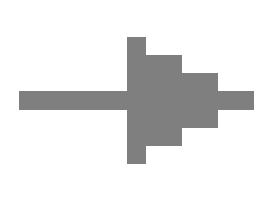

In [ ]:
img = cv.imread('sipka.png', cv.IMREAD_GRAYSCALE)
img[img == 0] = 255
show(img, interpolation=cv.INTER_NEAREST)

Calculate the contour length of the arrow:
-   'Contour length' means the number of black pixels


In [ ]:
img = cv.imread('sipka.png', cv.IMREAD_GRAYSCALE)
length = np.sum(img == 0)
print(f"Contour length: {length} pixels")

Contour length: 36 pixels


**Create the same grayscale collage** with ***lena.png*** image
-   With and without the OpenCV or NumPy functions
-   Compare the computational speed

![Collage](https://staff.utia.cas.cz/novozada/dizo/collage4.png)

handwritten: 0.001435 sec
np.flip: 0.002489 sec
cv2.vconcat: 0.005565 sec


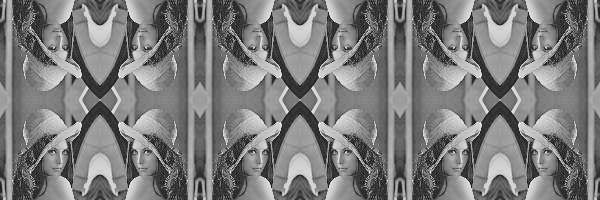

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
stime = time.time()
ul = img[::-1]
ur = ul[:,::-1]
dl = img
dr = dl[:,::-1]
img_new1 = np.concatenate((np.concatenate((ul, ur), axis=1),\
            np.concatenate((dl, dr), axis=1)), axis=0)
print(f"handwritten: {time.time()-stime:.6f} sec")

stime = time.time()
ul = np.flipud(img)
ur = np.fliplr(ul)
dl = img
dr = np.fliplr(dl)
img_new2 = np.concatenate((np.concatenate((ul, ur), axis=1),\
            np.concatenate((dl, dr), axis=1)), axis=0)
print(f"np.flip: {time.time()-stime:.6f} sec")

stime = time.time()
ul = cv.flip(img,0)
ur = cv.flip(ul,1)
dl = img
dr = cv.flip(dl,1)
img_new3 = cv.vconcat([cv.hconcat([ul, ur]),\
                       cv.hconcat([dl, dr])])
print(f"cv2.vconcat: {time.time()-stime:.6f} sec")

show_more(200, img_new1, img_new2, img_new3)

**Resize the** ***lena.png*** image to the half size in both directions
-   With and without the OpenCV or NumPy functions
-   Compare the computational speed

Image Properties - original
- Number of Pixels: 786432
- Shape/Dimensions: (512, 512, 3)

Image Properties - cv2.resize():
- Number of Pixels: 196608
- Shape/Dimensions: (256, 256, 3)
cv2.resize: 0.004769 sec

Image Properties - handwritten:
- Number of Pixels: 196608
- Shape/Dimensions: (256, 256, 3)
handwritten: 0.005199 sec


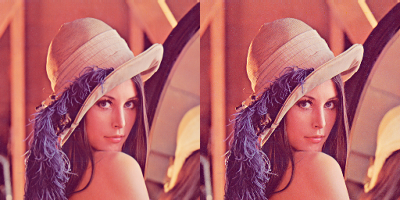

In [ ]:
img = cv.imread('lena.png')
print("Image Properties - original")
print(f"- Number of Pixels: {img.size}")
print(f"- Shape/Dimensions: {img.shape}\n")

stime = time.time()
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
imgCV = cv.resize(img, dim)
print("Image Properties - cv2.resize():")
print(f"- Number of Pixels: {imgCV.size}")
print(f"- Shape/Dimensions: {imgCV.shape}")
print(f"cv2.resize: {time.time()-stime:.6f} sec\n")

stime = time.time()
imgHW = img[::2,::2]
print("Image Properties - handwritten:")
print(f"- Number of Pixels: {imgHW.size}")
print(f"- Shape/Dimensions: {imgHW.shape}")
print(f"handwritten: {time.time()-stime:.6f} sec")
show_more(200, imgCV, imgHW)

**Alpha blending**

Do alpha blending with OpenCV
-   Input image 1 – ***flags/Portugal.png***
-   Input image 2 – ***flags/Czech_Republic.png***

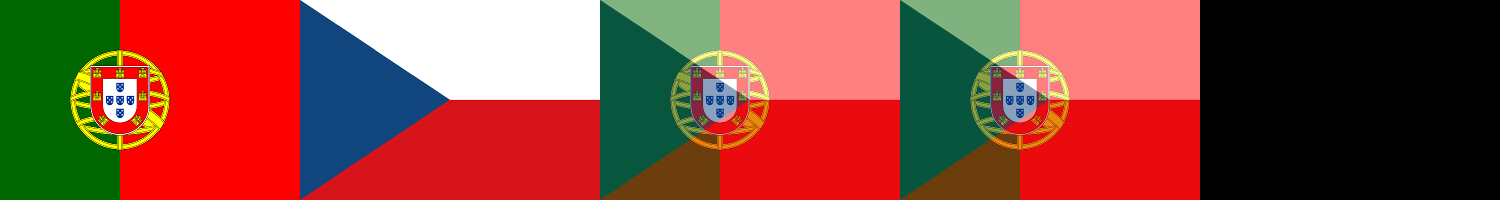

Max diff = 0.3


In [ ]:
img1 = cv.imread('flags/Portugal.png')
img2 = cv.imread('flags/Czech_Republic.png')
img2 = cv.resize(img2, img1.shape[1::-1])
alpha = 0.5
beta = 0.5
gamma = 0.2
imgO1 = cv.addWeighted(img1, alpha, img2, beta, gamma)
imgO2 = img1 * alpha + img2 * beta + gamma
show_more(200, img1, img2, imgO1, imgO2, np.abs(imgO1 - imgO2))
print(f"Max diff = {np.max(np.abs(imgO1-imgO2)):.2}")

### Thresholding

*   Try different type of thresholding in OpenCV and find their equivalent in matrix indexing

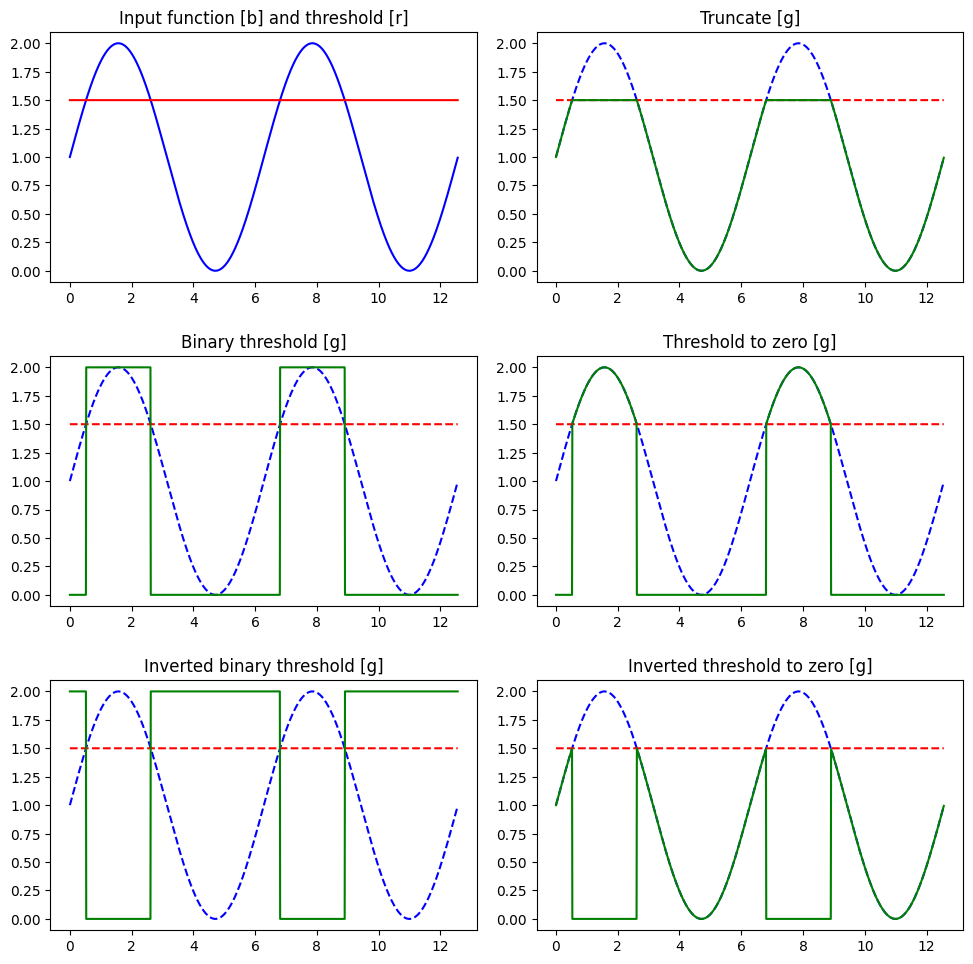

In [ ]:
thresh = 1.5

x = np.arange(0, 4 * np.pi, 0.01)
t = x * 0 + thresh
y = np.sin(x) + 1;

yBinary = np.copy(y)
yBinaryInv = np.copy(y)
yTrunc = np.copy(y)
yToZero = np.copy(y)
yToZeroInv = np.copy(y)

yBinary[y<thresh] = 0
yBinary[y>=thresh] = 2

yBinaryInv[y>=thresh] = 0
yBinaryInv[y<thresh] = 2

yToZero[y<thresh] = 0
yToZeroInv[y>=thresh] = 0

yTrunc[y>=thresh] = thresh

fig = plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.plot(x, y, 'b')
plt.plot(x, t, 'r')
plt.title('Input function [b] and threshold [r]')

plt.subplot(3,2,2)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yTrunc, 'g')
plt.title('Truncate [g]')

plt.subplot(3,2,3)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinary, 'g')
plt.title('Binary threshold [g]')

plt.subplot(3,2,4)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZero, 'g')
plt.title('Threshold to zero [g]')

plt.subplot(3,2,5)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinaryInv, 'g')
plt.title('Inverted binary threshold [g]')

plt.subplot(3,2,6)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZeroInv, 'g')
plt.title('Inverted threshold to zero [g]')
plt.tight_layout(pad=2.0)
plt.show()

Thresholding – **Binary Threshold & Binary Threshold**

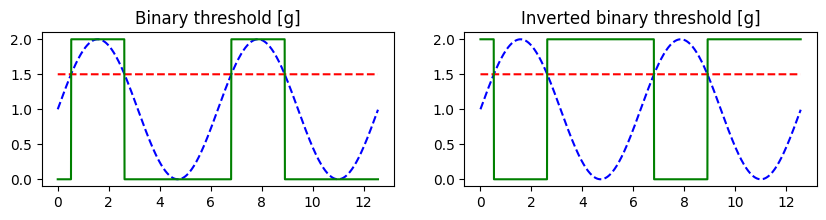

In [ ]:
fig = plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinary, 'g')
plt.title('Binary threshold [g]');
plt.subplot(1,2,2)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yBinaryInv, 'g')
plt.title('Inverted binary threshold [g]');

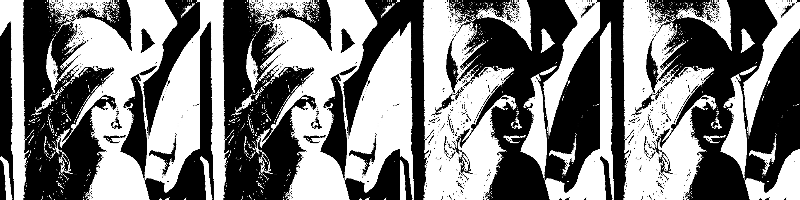

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
thresh = 127
max_value = 255

_, imgThreshCV = cv.threshold(img,thresh,max_value,cv.THRESH_BINARY)
_, imgThreshCV_inv = cv.threshold(img,thresh,max_value,cv.THRESH_BINARY_INV)
imgThreshHW = np.copy(img)
imgThreshHW[img>thresh] = max_value
imgThreshHW[img<=thresh] = 0
imgThreshHW_inv = np.copy(img)
imgThreshHW_inv[img>thresh] = 0
imgThreshHW_inv[img<=thresh] = max_value

show_more(200, imgThreshCV, imgThreshHW, imgThreshCV_inv, imgThreshHW_inv)

Thresholding – **Truncate**

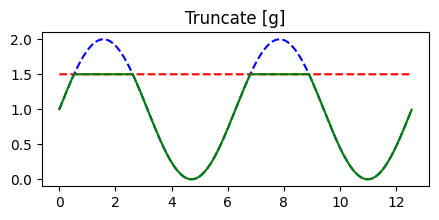

In [ ]:
fig = plt.figure(figsize=(5,2))
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yTrunc, 'g')
plt.title('Truncate [g]');

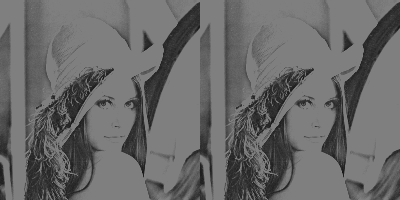

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
thresh = 127
max_value = 255

_, imgThreshCV = cv.threshold(img,thresh,max_value,cv.THRESH_TRUNC)
imgThreshHW = np.copy(img)
imgThreshHW[img>=thresh] = thresh
show_more(200, imgThreshCV, imgThreshHW)

Thresholding – **Threshold to Zero & Inverted Threshold to Zero**

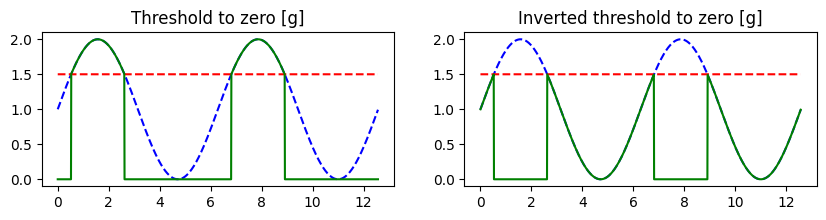

In [ ]:
fig = plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZero, 'g')
plt.title('Threshold to zero [g]')
plt.subplot(1,2,2)
plt.plot(x, y, 'b--')
plt.plot(x, t, 'r--')
plt.plot(x, yToZeroInv, 'g')
plt.title('Inverted threshold to zero [g]');

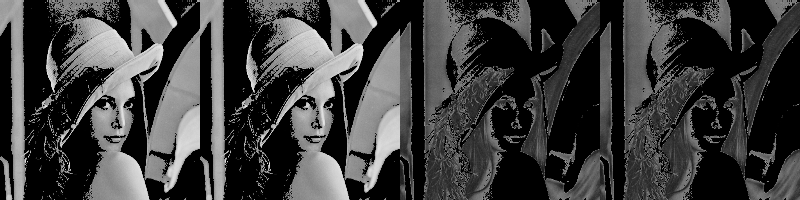

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
thresh = 127
max_value = 255

_, imgThreshCV = cv.threshold(img,thresh,max_value,cv.THRESH_TOZERO)
_, imgThreshCV_inv = cv.threshold(img,thresh,max_value,cv.THRESH_TOZERO_INV)
imgThreshHW = np.copy(img)
imgThreshHW[img<=thresh] = 0
imgThreshHW_inv = np.copy(img)
imgThreshHW_inv[img>thresh] = 0

show_more(200, imgThreshCV, imgThreshHW, imgThreshCV_inv, imgThreshHW_inv)

Thresholding – **All together**

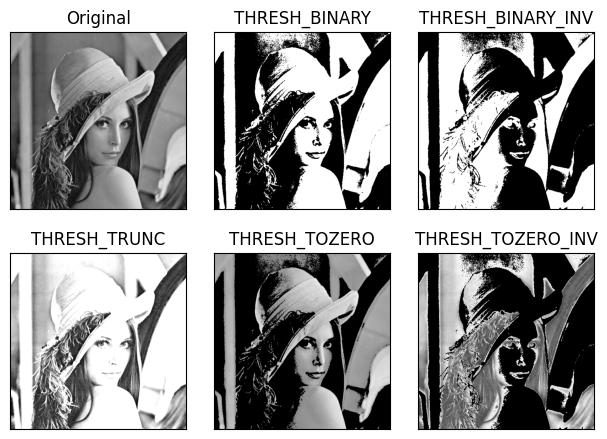

In [ ]:
img = cv.imread('lena.png', cv.IMREAD_GRAYSCALE)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC', \
          'THRESH_TOZERO','THRESH_TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout(pad=2.0)
plt.show()

## Batch file processing

Show all Flags in **./flags** folder

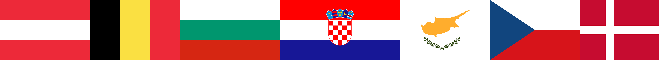

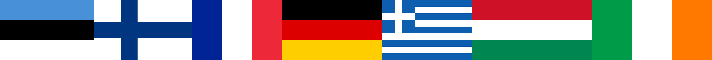

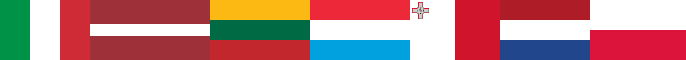

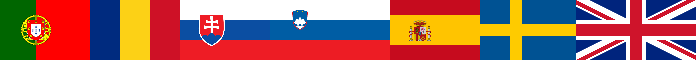

  0   flags/Austria.png
  1   flags/Belgium.png
  2   flags/Bulgaria.png
  3   flags/Croatia.png
  4   flags/Cyprus.png
  5   flags/Czech_Republic.png
  6   flags/Denmark.png
  7   flags/Estonia.png
  8   flags/Finland.png
  9   flags/France.png
 10   flags/Germany.png
 11   flags/Greece.png
 12   flags/Hungary.png
 13   flags/Ireland.png
 14   flags/Italy.png
 15   flags/Latvia.png
 16   flags/Lithuania.png
 17   flags/Luxembourg.png
 18   flags/Malta.png
 19   flags/Netherlands.png
 20   flags/Poland.png
 21   flags/Portugal.png
 22   flags/Romania.png
 23   flags/Slovakia.png
 24   flags/Slovenia.png
 25   flags/Spain.png
 26   flags/Sweden.png
 27   flags/United_Kingdom.png


In [ ]:
folderIn = 'flags'
exts = [f"{folderIn}/*.png"]
files = getFilenames(exts)

imgs = []
for fi in files:
  imgs.append(cv.imread(fi))

for idx in np.arange(0,len(imgs),7):
  show_more(60, *imgs[idx:idx+7])

files_with_num = [f"{idx:3.0f}   " + file for idx, file in zip(np.arange(len(files)), files)]
text = "\n".join(files_with_num)
print(text)

**Write a script for recoloring images in the selected folder**
* in all ***.png** images recolor the green pixels to white (255,255,255)
* save the new images to a subfolder (**\nG**)

**Use HSV color space rather than RGB color space**
* Hue **H** (color) (0° - 360°)
* Saturation **S** (saturation) (0% – 100%)
* Value **V** (brightness) (0% – 100%)

![RGB >> GRAY](https://staff.utia.cas.cz/novozada/dizo/hsv.png)

flags/Austria.png


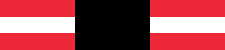

flags/Belgium.png


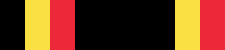

flags/Bulgaria.png


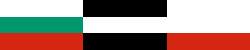

flags/Croatia.png


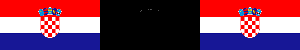

flags/Cyprus.png


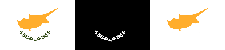

flags/Czech_Republic.png


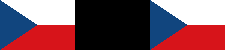

flags/Denmark.png


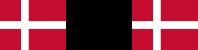

flags/Estonia.png


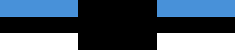

flags/Finland.png


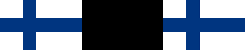

flags/France.png


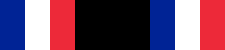

flags/Germany.png


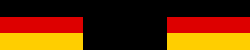

flags/Greece.png


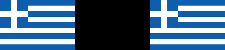

flags/Hungary.png


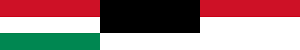

flags/Ireland.png


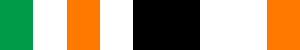

flags/Italy.png


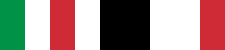

flags/Latvia.png


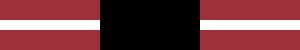

flags/Lithuania.png


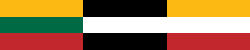

flags/Luxembourg.png


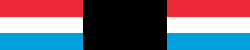

flags/Malta.png


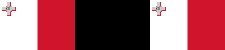

flags/Netherlands.png


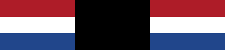

flags/Poland.png


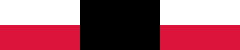

flags/Portugal.png


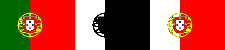

flags/Romania.png


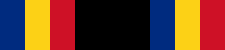

flags/Slovakia.png


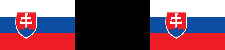

flags/Slovenia.png


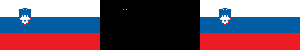

flags/Spain.png


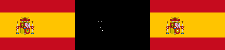

flags/Sweden.png


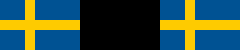

flags/United_Kingdom.png


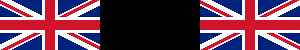

In [ ]:
def nogreen(img):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    lower_green = np.array([36, 0, 0])
    upper_green = np.array([86, 255, 255])
    mask = cv.inRange(hsv, lower_green, upper_green)
    result = np.copy(img)
    result[mask == 255] = (255, 255, 255)
    return mask, result

folderIn = 'flags'
folderOut = 'nG'
exts = [f"{folderIn}/*.png"]
frames = getFilenames(exts)

if not os.path.exists(folderOut):
    os.mkdir(folderOut)

for frame in frames:
    print(frame)
    img = cv.imread(frame, cv.IMREAD_COLOR)
    mask, out = nogreen(img)
    show(cv.hconcat([img, cv.cvtColor(mask,cv.COLOR_GRAY2BGR), out]), height=50)
    fileName = frame[6:]
    cv.imwrite(f"{folderOut}/{fileName}", out)

## Work with video – Chroma key compositing (Green-Screen)

**Foreground:**

* Object / animal /  human before the green/blue screen

**Background:**
* Scene to change green background

![RGB >> GRAY](https://staff.utia.cas.cz/novozada/dizo/compositing0.png)

![Marvel](https://staff.utia.cas.cz/novozada/dizo/marvel0.png)

Image via [Marvel](https://www.marvel.com/)

![Weather](https://staff.utia.cas.cz/novozada/dizo/weather.png)

This is how it looks when you put on a green dress -  [here](https://www.mirror.co.uk/news/world-news/weather-forecaster-wardrobe-malfunction-presenter-825367).


**Work with video – help : read&write**
Write a script for transforming video to grayscale
* Video input – ***weather.mp4***
* Video output – ***weather_gray.mp4***


In [ ]:
vidIn = 'weather.mp4'
vidOut = 'weather_gray.mp4'
capIn = cv.VideoCapture(vidIn)
width  = int(capIn.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(capIn.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = capIn.get(cv.CAP_PROP_FPS)
fourcc = cv.VideoWriter_fourcc(*'mp4v')
videoOut = cv.VideoWriter(vidOut, fourcc, fps, (width, height), False)

while capIn.isOpened():
    ret, frame = capIn.read()
    if ret == True:
        gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
        videoOut.write(gray)
    else:
        break
capIn.release()
videoOut.release()

**Write a script for chroma key compositing**
* Green-screen video – ***weather.mp4***
* Background image – ***forecast.jpg***
* save the new video

In [ ]:
def greenScreen(imgF, imgB):
  imgB_ = imgB.copy()
  hsv = cv.cvtColor(imgF, cv.COLOR_BGR2HSV)
  lower_green = np.array([30, 50, 40])
  upper_green = np.array([86, 255, 255])
  mask = cv.inRange(hsv, lower_green, upper_green)
  imgF[mask != 0] = [0, 0, 0]
  imgB_[mask == 0] = [0, 0, 0]
  return imgF + imgB_

vid = 'weather.mp4'
background = 'forecast.jpg'
vidOut = 'weather_out.mp4'
cap = cv.VideoCapture(vid)
frameB = cv.imread(background)
width  = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv.CAP_PROP_FPS)

fourcc = cv.VideoWriter_fourcc(*'mp4v')
videoOut = cv.VideoWriter(vidOut, fourcc, fps, (width, height))
while cap.isOpened():
    ret, frameF = cap.read()
    if ret == True:
        frame = greenScreen(frameF, frameB)
        videoOut.write(frame)
    else:
        break
cap.release()
videoOut.release()


For the sake of speed, we had to lower the resolution, so the resulting quality is not great.

## Edge Detection

How to detect edges in images?

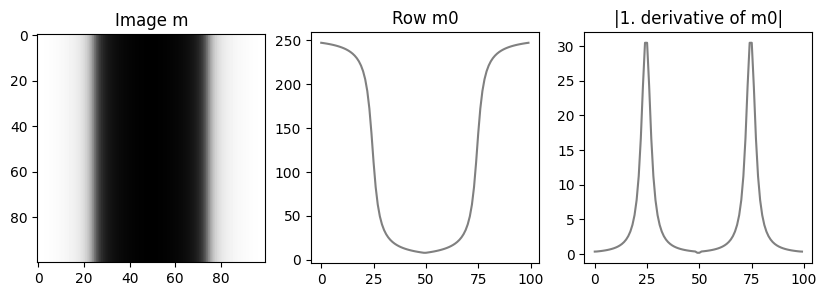

In [ ]:
x = np.linspace(-10, 10)
y = np.arctan(np.hstack((x[::-1], x)))
m = ((np.tile(y, (x.shape[0] * 2, 1)) + np.pi/2) / np.pi) * 255
m0 = np.asarray(m[0,:])

plt.figure(figsize=(10, 3))
plt.subplot(131)
plt.imshow(m, "gray")
plt.title("Image m")
plt.subplot(132)
plt.plot(m0, "gray")
plt.title("Row m0")
plt.subplot(133)
plt.plot(np.abs(np.gradient(m0)), "gray")
plt.title("|1. derivative of m0|");

### Based on 1. derivation

#### Roberts

Lawrence Roberts proposed it in 1963, and it was one of the first edge detectors. The Roberts operator measures a 2-D spatial gradient on an image. The input and output are both grayscale images.

The operator is made up of a pair of 2×2 convolution masks:
$$
\begin{aligned}
M_{1} =
\begin{pmatrix}
0 & 1\\
-1 & 0
\end{pmatrix}, \;
M_{2} =
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
\end{aligned}
$$

The masks can be applied to the input image independently to produce separate gradient component measurements in each orientation:
$$
\begin{aligned}
G_1 = \mathrm{Img} * M_1, \;G_2 = \mathrm{Img} * M_2
\end{aligned}
$$
The gradient magnitude is given by:
$$
\begin{aligned}
G = \sqrt{G_1^2 + G_2^2}
\end{aligned}
$$

At the end, we use the threshold on the $G$



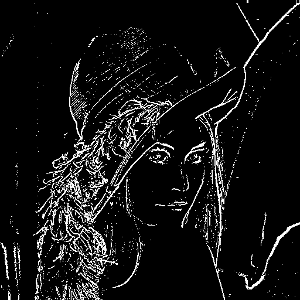

In [ ]:
def roberts(img, thresh):
  temp = img.astype(np.float32)
  m1 = np.array( [[ 0, 1 ], [ -1, 0 ]] )
  g1 = cv.filter2D(img, ddepth=-1, kernel=m1)
  g2 = cv.filter2D(img, ddepth=-1, kernel=np.rot90(m1))
  edges = np.hypot( g1, g2) >= thresh
  return edges.astype(np.uint8) * 255

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
img_rob = roberts(img, 20)
show(img_rob, 300)

It incorrectly detects diagonal edges - our improvements:

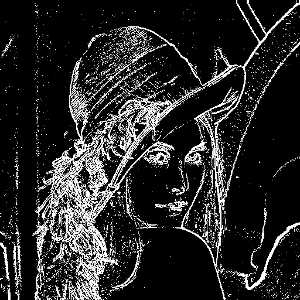

In [ ]:
def roberts_our(img, thresh):
  temp = img.astype(np.float32)
  m1 = np.array( [[ 0, 1 ], [ -1, 0 ]] )
  m2 = np.array( [-1, 1 ] )
  g1 = cv.filter2D(img, ddepth=-1, kernel=m1)
  g2 = cv.filter2D(img, ddepth=-1, kernel=np.rot90(m1))
  g3 = cv.filter2D(img, ddepth=-1, kernel=m2)
  g4 = cv.filter2D(img, ddepth=-1, kernel=np.transpose(m2))
  edges1 = np.hypot( g1, g2) >= thresh
  edges2 = np.hypot( g3, g4) >= thresh
  return (edges1 | edges2).astype(np.uint8) * 255

img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
img_rob = roberts_our(img, 15)
show(img_rob, 300)

#### Sobel
It is named after Irwin Sobel and Gary Feldman - they presented the idea in 1968.

The Sobel operator works similarly to the Roberts operator. It also has a pair of 3×3 convolution masks (vertical and horizontal):
$$
\begin{aligned}
M_{x} =
\begin{pmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{pmatrix}, \;
M_{y} =
\begin{pmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{pmatrix}
\end{aligned}
$$
<br />
$$
\begin{aligned}
G_x = \mathrm{Img} * M_1, \;G_y = \mathrm{Img} * M_2
\end{aligned}
$$
<br />
$$
\begin{aligned}
G = \sqrt{G_x^2 + G_y^2}
\end{aligned}
$$

At the end, we use the threshold on the $G$

#### Prewitt
Same as Sobel, but with these masks:
$$
\begin{aligned}
M_{x} =
\begin{pmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1
\end{pmatrix}, \;
M_{y} =
\begin{pmatrix}
1 & 1 & 1\\
0 & 0 & 0\\
-1 & -1 & -1
\end{pmatrix}
\end{aligned}
$$

#### Kirsch
Again, it's just a matter of changing the masks:
$$
\begin{aligned}
M_{n} =
\begin{pmatrix}
5 & 5 & 5\\
-3 & 0 & -3\\
-3 & -3 & -3
\end{pmatrix},
\end{aligned}
$$
<br />
where $n=\{ 1,2,..,8 \} $ ~ 45-degree rotation of single kernel through 8 directions.

$$
\begin{aligned}
G_{\mathrm{final}} =
\max_{n}\;\mathrm{Img} * M_n
\end{aligned}
$$
<br />
Then we will use threshold applied on this mask to get the final output.

#### Canny

The Canny edge detector uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986.

**The Canny edge detection algorithm is composed of 5 steps:**

0.  Convert the image to grayscale if it is colored
1.  Noise reduction
2.  Gradient calculation
3.  Non-maximum suppression
4.  Double threshold
5.  Edge Tracking by Hysteresis

**0. Convert the image:**


In [ ]:
img = cv.imread('lena.png')
img_0 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

**1. Noise Reduction**

Edge detection results are highly sensitive to image noise >> applying Gaussian blur to smooth it

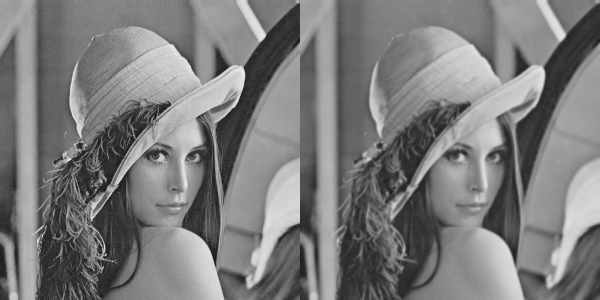

In [ ]:
img_1 = cv.GaussianBlur(img_0, ksize=(0, 0), sigmaX=1.4, sigmaY=1.4)
show_more(300, img_0, img_1)

**2. Gradient Calculation**

To calculate the edge intensity and direction (horizontal and vertical) we use two Sobel kernels:

$$
\begin{aligned}
K_{x} =
\begin{pmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{pmatrix},\;
K_{y} =
\begin{pmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{pmatrix}
\end{aligned}
$$
<br />
The magnitude $G$ and the slope $\theta$ of the gradient are calculated as follow:
$$
\begin{aligned}
|G| = \sqrt{I_x^2+I_y^2}
\end{aligned}
$$
$$
\begin{aligned}
\theta(x,y) = arctan(\frac{I_y}{I_x})
\end{aligned}
$$

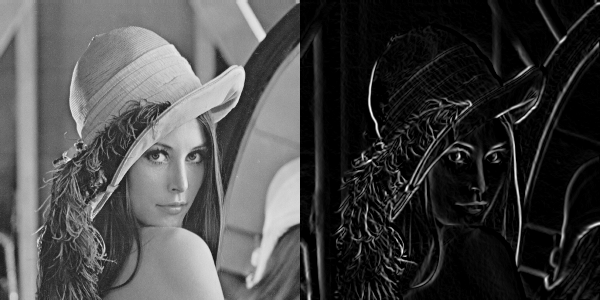

In [ ]:
def canny_sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = cv.filter2D(img, ddepth=-1, kernel=Kx)
    Iy = cv.filter2D(img, ddepth=-1, kernel=Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return G, theta

img_2_G, img_2_theta = canny_sobel_filters(img_1)
show_more(300, img_0, img_2_G.astype(np.uint8))

**3. Non-maximum suppression**

To thin out the edges:
* The algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.

The steps of algorithm are:
* Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
* Identify the edge direction based on the angle value from the angle matrix;
* Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
* Return the image processed with the non-max suppression algorithm.

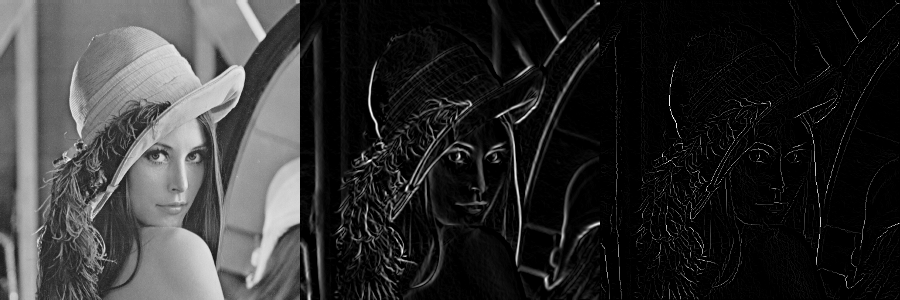

In [ ]:
def canny_non_max_suppression(img, D):
  M, N = img.shape
  Z = np.zeros((M,N), dtype=np.int32)
  angle = D * 180. / np.pi
  angle[angle < 0] += 180
  for i in range(1,M-1):
    for j in range(1,N-1):
      try:
        q = 255
        r = 255
        #angle 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
          q = img[i, j+1]
          r = img[i, j-1]
        #angle 45
        elif (22.5 <= angle[i,j] < 67.5):
          q = img[i+1, j-1]
          r = img[i-1, j+1]
        #angle 90
        elif (67.5 <= angle[i,j] < 112.5):
          q = img[i+1, j]
          r = img[i-1, j]
        #angle 135
        elif (112.5 <= angle[i,j] < 157.5):
          q = img[i-1, j-1]
          r = img[i+1, j+1]

        if (img[i,j] >= q) and (img[i,j] >= r):
          Z[i,j] = img[i,j]
        else:
          Z[i,j] = 0
      except IndexError as e:
        pass
  return Z

img_3 = canny_non_max_suppression(img_2_G, img_2_theta)
show_more(300, img_0, img_2_G.astype(np.uint8), img_3.astype(np.uint8))

**4. Double threshold**
We identify 3 kinds of pixels:

1.   **Strong** pixels are pixels that have an intensity so high that we are sure they contribute to the final edge.
2.   **Weak** pixels are pixels that have an intensity value that is not enough to be considered as strong ones, but yet not small enough to be considered as non-relevant for the edge detection.
3.   Other pixels are considered as **non-relevant** for the edge.

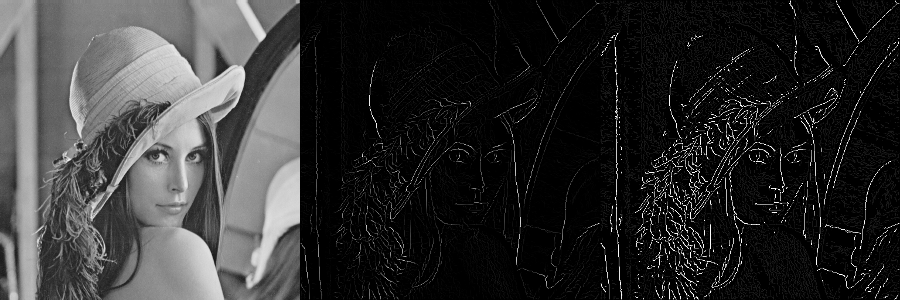

In [ ]:
def canny_threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.12):
  highThreshold = img.max() * highThresholdRatio;
  lowThreshold = highThreshold * lowThresholdRatio;
  M, N = img.shape
  res = np.zeros((M,N), dtype=np.int32)
  weak = np.int32(25)
  strong = np.int32(255)
  strong_i, strong_j = np.where(img >= highThreshold)
  zeros_i, zeros_j = np.where(img < lowThreshold)
  weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
  res[strong_i, strong_j] = strong
  res[weak_i, weak_j] = weak
  return res, weak, strong

img_4_res, img_4_weak, img_4_strong = canny_threshold(img_3)
show_more(300, img_0, img_3.astype(np.uint8), img_4_res.astype(np.uint8))

**5. Edge Tracking by Hysteresis**

Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one.

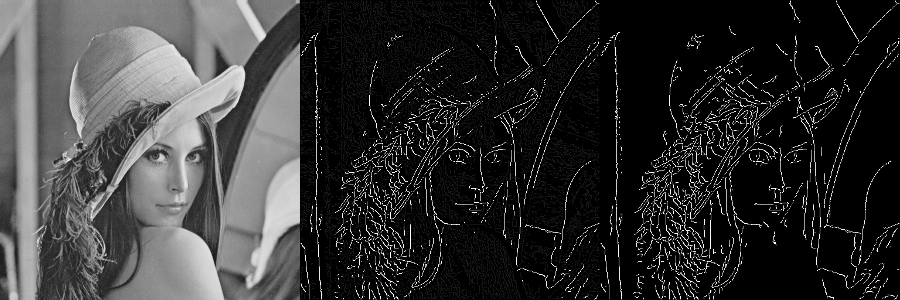

In [ ]:
def hysteresis(img, weak, strong=255):
  imgo = np.copy(img)
  M, N = imgo.shape
  for i in range(1, M-1):
    for j in range(1, N-1):
      if (imgo[i,j] == weak):
        try:
          if ((imgo[i+1, j-1] == strong) or (imgo[i+1, j] == strong) or (imgo[i+1, j+1] == strong)
            or (imgo[i, j-1] == strong) or (imgo[i, j+1] == strong)
            or (imgo[i-1, j-1] == strong) or (imgo[i-1, j] == strong) or (imgo[i-1, j+1] == strong)):
            imgo[i, j] = strong
          else:
            imgo[i, j] = 0
        except IndexError as e:
          pass
  return imgo

img_5 = hysteresis(img_4_res, img_4_weak, img_4_strong)
show_more(300, img_0, img_4_res.astype(np.uint8), img_5.astype(np.uint8))

**Time Comparison with the OpenCV function**

Hand made: 3.7062
OpenCV: 0.0053 >> 702x faster :)


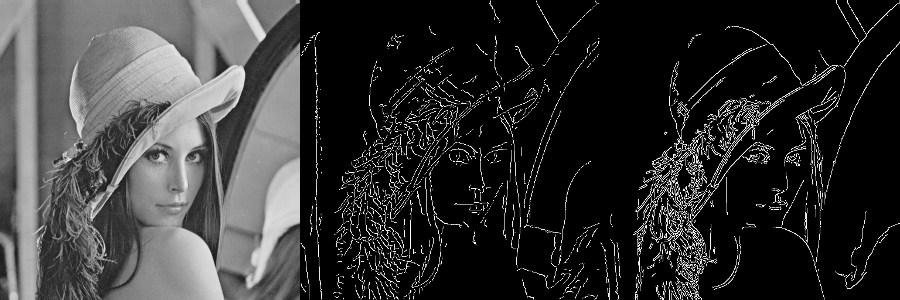

In [ ]:
import time

start = time.time()
temp = cv.GaussianBlur(img_0, ksize=(0, 0), sigmaX=1.4, sigmaY=1.4)
temp, temp_theta = canny_sobel_filters(temp)
temp = canny_non_max_suppression(temp, temp_theta)
temp, temp_weak, temp_strong = canny_threshold(temp)
temp  = hysteresis(temp, temp_weak, temp_strong)
end = time.time()
mytime = time.time() - start
print(f'Hand made: {mytime:.4f}')

start = time.time()
cvtemp = cv.Canny(img_0,100,200)
cvtime = time.time() - start
print(f'OpenCV: {cvtime:.4f} >> {mytime / cvtime:.0f}x faster :)')
show_more(300, img_0, temp.astype(np.uint8), cvtemp.astype(np.uint8))

## Convolution

$$
\begin{aligned}
(f*g)(t) = \int_{-\infty}^\infty f(\tau)g(t-\tau)\;\mathrm{d}\tau
\end{aligned}
$$
<br />
$$
\begin{aligned}
(f*g)(n) = \sum_{m=-\infty}^\infty f(m)g(n-m)\
\end{aligned}
$$

Let's show a convolution on a 1d sinusoid with added random noise

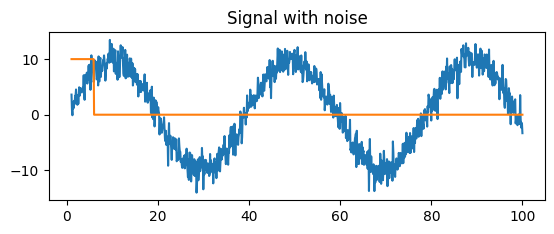

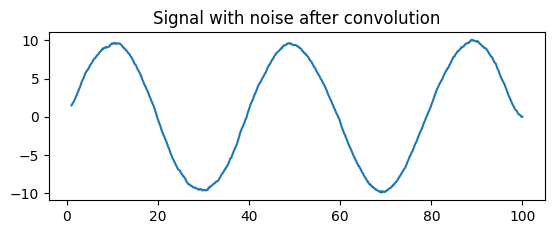

In [ ]:
x = np.linspace(1, 100, 1000)
f = 10*np.sin(x/(2*np.pi))
mean = 0.0
std = 1.5
noise = np.random.normal(mean, std, len(f))
# Noise up the original signal
f_noise = f + noise

g=np.ones(50)*10
gg = np.zeros(len(f))
gg[:len(g)] = g

plt.subplot(2,1,1)
plt.plot(x, f_noise)
plt.plot(x, gg)
plt.title('Signal with noise')
plt.show()

f_conv = np.convolve(f_noise,g,'same')

plt.subplot(2,1,1)
plt.plot(x, f_conv/np.sum(gg))
plt.title('Signal with noise after convolution')
plt.show()

## Hough Transform

**What is the Hough transform and what is it used for?:**
-  a method for finding a parametric description of objects in an image
-  originally for detecting simple objects in an image such as lines, circles, ellipses, etc.
-  it is mainly used to segment objects whose boundaries can be described by simple curves
-  application also in 3D vision

<img src="https://staff.utia.cas.cz/novozada/dizo/htdemo.png">


**Presentation about HT:**
[Everything you were afraid to ask about Hough Transform :)](https://staff.utia.cas.cz/novozada/dizo/HoughTransformPrezentace.pdf)


### Line parameterization:
Do not use thist line parameterization:
$
\begin{aligned}
y &= a x  + b
\end{aligned}
$

- It causes problems with vertical lines.

Duda and Hart [1971] proposed the use of the Hesse normal form:
$$
\begin{align}\Large
r = \color{purple}{x \, \cos \, \theta} + \color{orange}{y \, \sin \, \theta}
\end{align}
$$
where $r$ is the distance from the origin to the closest point on the straight line, and $\theta$  is the angle between the $x$ axis and the line connecting the origin with that closest point.

<br />
<img src="https://staff.utia.cas.cz/novozada/dizo/line0.png" height="200px">

Hence, each straight line in the image can be represented as a point ($\theta$, $r$) in the parameter space.

<img src="https://staff.utia.cas.cz/novozada/dizo/ht04.jpg"  height="300px">



### Hough transform from the scratch

Read the image **chessboard.png** and do these steps:


1.   resize it to 256px in height
2.   convert it to grayscale
3.   detect its edges

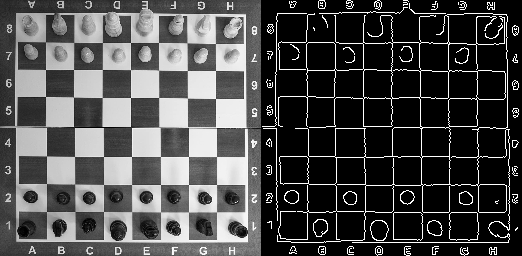

In [ ]:
img = cv.imread('chessboard.png')
img = resize(img, 256)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
canny = cv.Canny(gray, 400, 600)
show_more(256, gray, canny)

Write the Hough transform

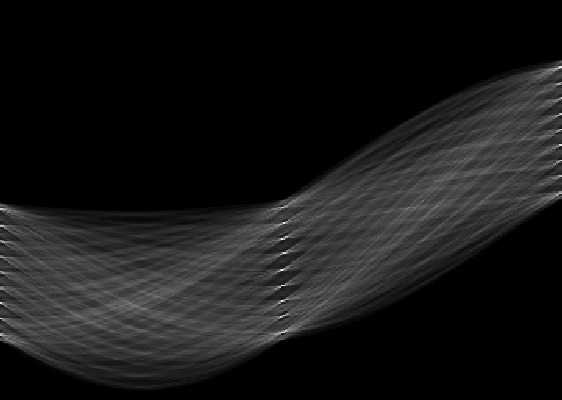

In [ ]:
def hough(img, dists=200, thetas=180):
  hits = np.zeros((dists, thetas))
  # size of one pixel in real distances
  pix2dists = dists / np.linalg.norm(img.shape) / 2
  # passing all pixels of the image
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      # we only want non-zero points
      if img[y, x] > 0:
        # we calculate the distance from the origin
        # for all directions of lines passing through the point
        for idx_theta in range(thetas):
          # the angle in radians
          theta = idx_theta / thetas   * np.pi
          # distance of the line from the origin in pixels
          r = x * np.cos(theta) + y * np.sin(theta)
          # distance rescaled to lengths
          idx_r = int(np.round(r * pix2dists + (dists - 1) / 2))
          # the point with angle theta has another hit for distance r
          hits[idx_r,idx_theta] += 1
  return hits

ht = hough(canny,256,360)
show(ht, 400, interpolation=cv.INTER_NEAREST)

Use the HT to find lines in the image

$$
\begin{align}
r & = x \cos\theta + y\sin\theta \\
y & = \frac{r - x \cos\theta}{\sin\theta }
\end{align}
$$

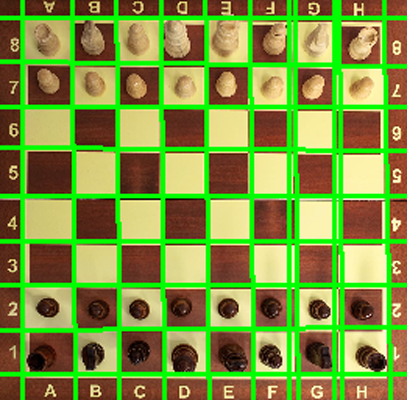

None

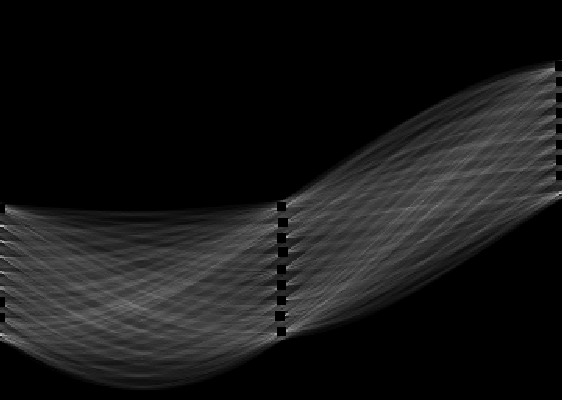

None

In [ ]:
def paint_lines(img, r, theta, is_radian = False):
  if not is_radian:
    theta = theta / 180 * np.pi
  if np.abs(np.sin(theta)) < 1e-15:
    start_point = (int(r), 0)
    end_point = (int(r), img.shape[0])
  else:
    start_point = (0, int((r - 0 * np.cos(theta)) / np.sin(theta)))
    end_point = (img.shape[1], int((r - img.shape[1] * np.cos(theta)) / np.sin(theta)))
  img = cv.line(img, start_point, end_point, (0, 255, 0), thickness=2)
  return img

def show_lines(img, ht):
  msize = 3
  diagonal = np.linalg.norm(img.shape[:2])
  for idx in range(num_lines):
    idx_r,idx_theta = np.unravel_index(ht.argmax(), ht.shape)
    theta = idx_theta / ht.shape[1] * 180
    r = idx_r / ht.shape[0] * 2 * diagonal - diagonal
    paint_lines(img, r, theta)
    ht[max(idx_r-msize,0):min(idx_r+msize,ht.shape[0]),\
            max(idx_theta-msize,0):min(idx_theta+msize,ht.shape[1])] = 0
    display.clear_output(wait=True)
    display.display(show(img, 400))
    display.display(show(ht, 400, interpolation=cv.INTER_NEAREST))
    time.sleep(1)

temp = img.copy()
ht_temp = ht.copy()
num_lines = 20
show_lines(temp, ht_temp)

Try doing the same for the rotated chessboard: **chessboard_rot.png**

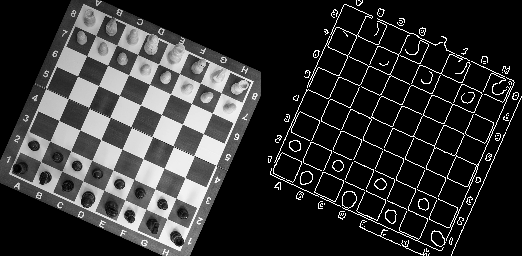

In [ ]:
img_rot = cv.imread('chessboard_rot.png')
img_rot = resize(img_rot, 256)
gray_rot = cv.cvtColor(img_rot, cv.COLOR_BGR2GRAY)
canny_rot = cv.Canny(gray_rot, 400, 600)
show_more(256, gray_rot, canny_rot)

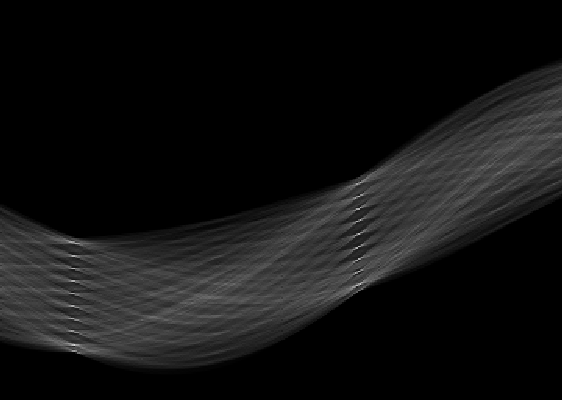

In [ ]:
ht_rot = hough(canny_rot,256,360)
show(ht_rot, 400, interpolation=cv.INTER_NEAREST)

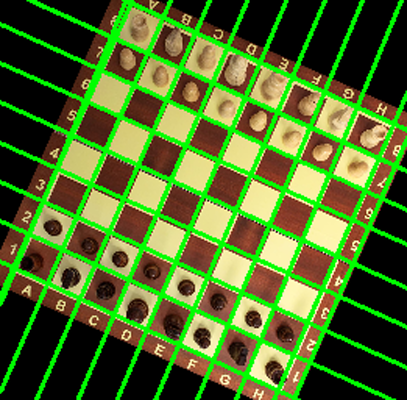

None

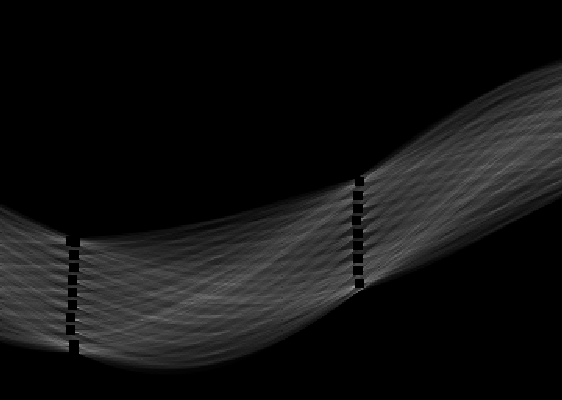

None

In [ ]:
temp = img_rot.copy()
ht_temp = ht_rot.copy()
num_lines = 20
show_lines(temp, ht_temp)

### Hough Tranform in OpenCV

**[`lines = cv.HoughLines()`](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a)**

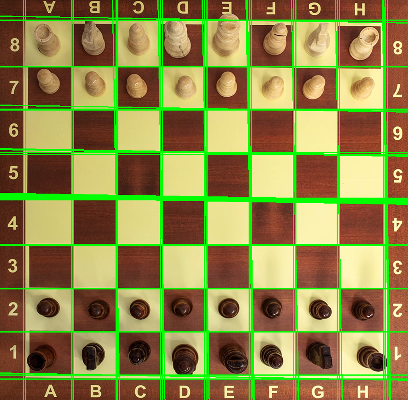

In [ ]:
img = cv.imread('chessboard.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 400, 600)

lines = cv.HoughLines(edges,1,np.pi/180,150)
for r, theta in lines[:,0]:
  img = paint_lines(img, r, theta, is_radian = True)

show(img,400)

#### Randomized (Probabilistic) Hough Transform

Randomized Hough transform is different from HT in that it tries to avoid conducting the computationally expensive voting process for every nonzero pixel in the image by taking advantage of the geometric properties of analytical curves, and thus improve the time efficiency and reduce the storage requirement of the original algorithm.

**[`lines = cv.HoughLinesP()`](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb)**

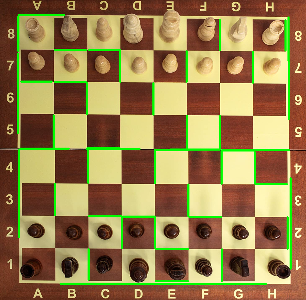

In [ ]:
img = cv.imread('chessboard.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 400, 600)

minLineLength = 10
maxLineGap = 100
lines = cv.HoughLinesP(edges,1,np.pi/180,10,minLineLength,maxLineGap)

for x1,y1,x2,y2 in lines[:,0]:
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),5)

show(img,300)

### Hough Transform for an Analytic Curve

<img src="https://staff.utia.cas.cz/novozada/dizo/htparametric2.png" height="250px">

#### HT for circles
<img src="https://staff.utia.cas.cz/novozada/dizo/htdemo_circles.png"  height="250px">

Try to find circles in this image:
<img src="https://staff.utia.cas.cz/novozada/dizo/circle.jpg">

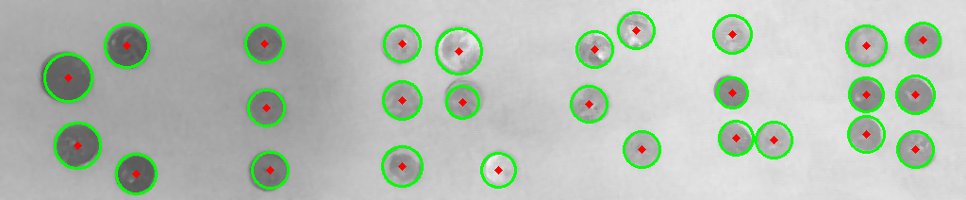

In [ ]:
img = cv.imread('circle.jpg',1)
img = img[:,:,2]
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=20,
                            param1=50,param2=30,minRadius=5,maxRadius=50)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

show(cimg)

# Part 3: Practical Exercise - One image overview - step by step

In [7]:
# Importing libraries:
import numpy as np
from tqdm.auto import tqdm
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import pandas as pd
from frame_orientation import find_intersections, extract_undistorted_part

# Ground truth data for verification
df_shifts = pd.read_csv('jadro01_shifts.csv')
ROPE_LENGTH_MM = 5000
ROD_LENGTH_MM = 3800
ground_truth_angles_rad = np.arctan(df_shifts["abs_shift_x_mm"] / (ROPE_LENGTH_MM + ROD_LENGTH_MM))

### Read the video file with its parameters

In [8]:
# Name of the video file:
video_file = "jadro01_video.mp4"
vidcap = cv2.VideoCapture(video_file)
LENGTH = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
WIDTH  = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
HEIGHT = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
FPS    = vidcap.get(cv2.CAP_PROP_FPS)
print(f'length = {LENGTH} \nresolution = {WIDTH}x{HEIGHT} \nfps = {FPS} ')

length = 3000 
resolution = 750x600 
fps = 25.0 


### Preview some frames from the video

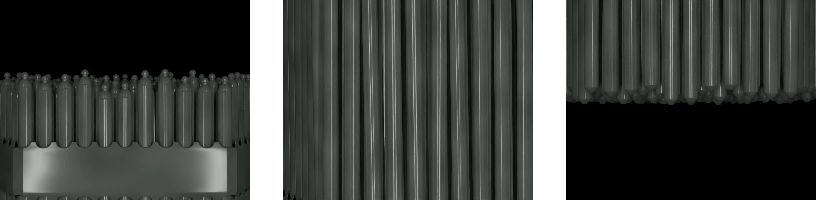

In [9]:
# get the first frame
vidcap.set(cv2.CAP_PROP_POS_FRAMES,0)
firstsuccess, firstframe = vidcap.read()
# get the middle frame
vidcap.set(cv2.CAP_PROP_POS_FRAMES,np.floor(LENGTH/2))
middlesuccess, middleframe = vidcap.read()
# get the last frame
vidcap.set(cv2.CAP_PROP_POS_FRAMES,LENGTH - 1)
lastsuccess, lastframe = vidcap.read()
# show all three frames on one line
if firstsuccess and middlesuccess and lastsuccess:
  show_more(200, firstframe, np.ones([HEIGHT,100,3],dtype=np.uint8)*255,
            middleframe,np.ones([HEIGHT,100,3],dtype=np.uint8)*255, lastframe)

Load the image data into memory

In [10]:
start_frame = 0
stop_frame = LENGTH

vidcap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
frames = []
for i in tqdm(range(start_frame, stop_frame),total=stop_frame-start_frame,desc='Reading Frames'):
    success, frame = vidcap.read()
    if success:
        # We are using only first channel
        frames.append(frame[:,:,0])
    else:
        print(f"WARNING: Frame {i} reading failed. Skipped!")

Reading Frames:   0%|          | 0/3000 [00:00<?, ?it/s]

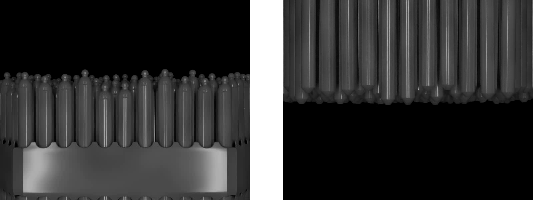

In [11]:
# show the first and last frame from the list
show_more(200, frames[0], np.ones([HEIGHT,100],dtype=np.uint8)*255, frames[-1])

## Frame orientation
The scanning device setup may not be ideal, e.g. the camera is tilted. For this reason, we try to correct the tilt algorithmically. We try to find the angle by which the image is rotated.

Since most images contain only bars that are oriented vertically, we assume that the correct rotation of the image is achieved when the bars are oriented vertically.

### Application of the Hough transform

Now we can use the knowledge of the **Canny** edge detector and **Hough Transform** to detect the lines.

In [12]:
spacer_grid_frame_num = 50

# In case of spherical distortion the lines can be curved, especially in the corners of a frame
# As a quick workaround we can crop the central part (less deformed) and perform orientation
# estimation just on this crop. So choose between those two branches (try both, compare results).

# Spherical distortion:
#frame, correction_angle_deg = extract_undistorted_part(frames[spacer_grid_frame_num])
# No spherical distortion:
correction_angle_deg = 0 # this variable has meaning only for code two lines above
frame = frames[spacer_grid_frame_num]

blur = cv2.GaussianBlur(frame, (9, 9), 0)
edges = cv2.Canny(blur, 20, 60)

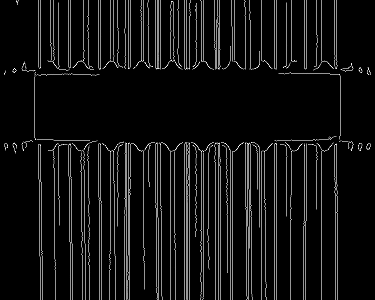

In [13]:
show(edges, 300)

Find straight lines and compute their angle by the Hough Transform:

In [15]:
hough_lines = cv2.HoughLines(image=edges, 
                             rho=1, # distance resolution of the accumulator in pixels
                             theta=np.pi/18000, # resolution of the accumulator in radians (0.01°)
                             threshold=160, # threshold for the accumulator 
                             min_theta=np.deg2rad(-correction_angle_deg - 5), 
                             max_theta=np.deg2rad(-correction_angle_deg + 5))

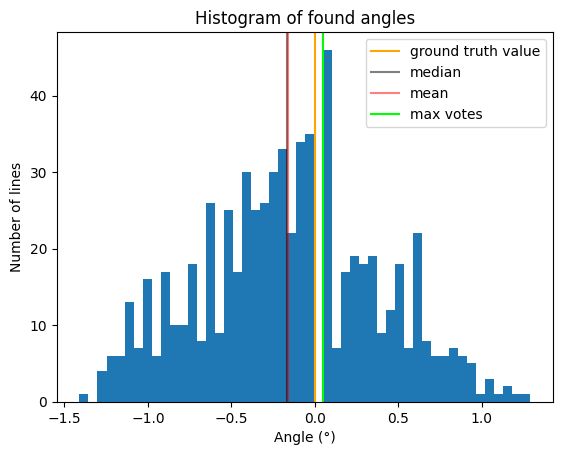

In [16]:
hist = plt.hist(np.rad2deg(hough_lines[:,:,1]) + correction_angle_deg, bins=50)
plt.axvline(np.rad2deg(ground_truth_angles_rad[spacer_grid_frame_num]), color="orange", label="ground truth value")
plt.axvline(np.nanmedian(np.rad2deg(hough_lines[:,:,1]) + correction_angle_deg), 
            color="black", label="median", alpha=0.5)
plt.axvline(np.nanmean(np.rad2deg(hough_lines[:,:,1]) + correction_angle_deg), color="red", label="mean", alpha=.5)
plt.axvline(hist[1][np.argmax(hist[0])], color="lime", label="max votes")
plt.xlabel("Angle (°)")
plt.ylabel("Number of lines")
plt.title("Histogram of found angles")
plt.legend()
plt.show()

### Derivation of the angle from Hough lines

In [29]:
# Here you can play with various approaches to angle estimation

# Median value
rotation_angle_rad = np.median(hough_lines[:,0,1]) + np.deg2rad(correction_angle_deg)

# Histogram maximum
#angles_hist = np.histogram(hough_lines[:,:,1])
#rotation_angle_rad = angles_hist[1][np.argmax(angles_hist[0])] + np.deg2rad(correction_angle_deg)

# ... stability of the method is crucial for photogrammetry (but not so much for OIO build up)

In [30]:
# frame_orientation contains our custom code for frame_orientation estimation and handling
from frame_orientation import rotate_image

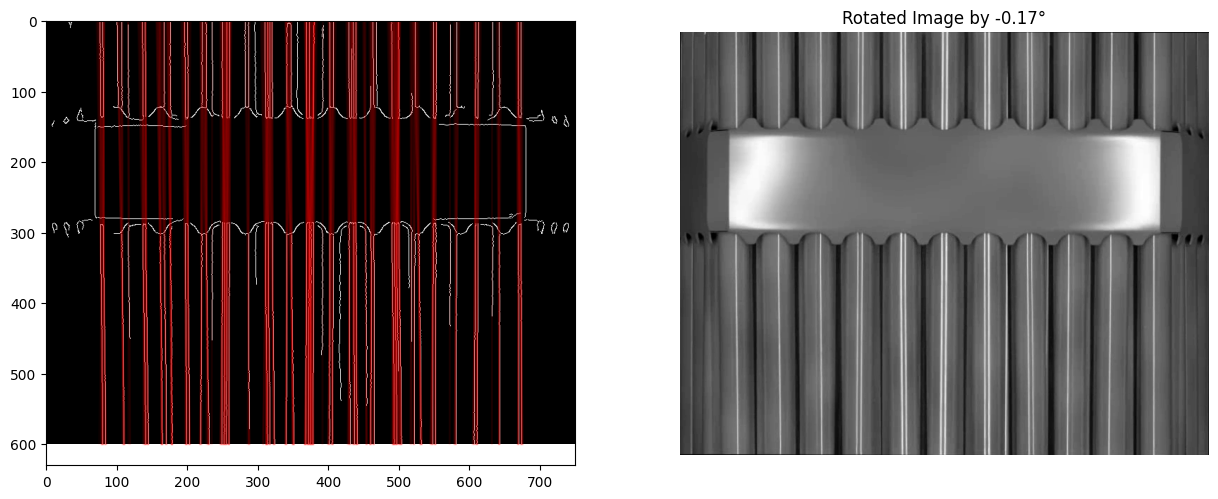

In [31]:
plt.figure(figsize=(15,10))
ax = plt.subplot(121)
ax.imshow(edges, cmap="gray")
for i in range(len(hough_lines)):
  rho = hough_lines[i,0,0]
  theta = hough_lines[i,0,1]

  intersection = find_intersections(rho, theta, edges.shape[1], edges.shape[0])
  if intersection is not None:
      pt1, pt2 = intersection
      ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color="red", alpha=0.05)


ax = plt.subplot(122)
ax.imshow(rotate_image(frame, rotation_angle_rad), cmap="gray")

ax.set_title(f"Rotated Image by {np.rad2deg(rotation_angle_rad):.2f}°")
ax.axis('off')
plt.show()

## Rotation of all frames

The steps descirbe above should be applied on every frame in the video. Angle is different for each frame, because of vibration, fuel swinging and fuel assembly bow.

In [74]:
# Call everything thru one function
def find_rotation(frame):
  correction_angle = 0
  frame, correction_angle_deg = extract_undistorted_part(frame)
  blur = cv2.GaussianBlur(frame, (9, 9), 0)
  edges = cv2.Canny(blur, 20, 80)
  hough_lines = cv2.HoughLines(image=edges, 
                             rho=1, # distance resolution of the accumulator in pixels
                             theta=np.pi/18000, # resolution of the accumulator in radians
                             threshold=160, # threshold for the accumulator 
                             min_theta=np.deg2rad(-correction_angle_deg - 5), 
                             max_theta=np.deg2rad(-correction_angle_deg + 5))

  # Get the median and count the rotation angle
  if hough_lines is not None and hough_lines.shape[0] > 3:
      # rotation angle to reach vertical rods:
      
      # Median
      rotation_angle = np.median(hough_lines[:,0,1]) + np.deg2rad(correction_angle_deg)

      # Histogram
      #angles_hist = np.histogram(hough_lines[:,:,1])
      #rotation_angle = angles_hist[1][np.argmax(angles_hist[0])] + np.deg2rad(correction_angle_deg)
  else:
    # not enough vertical edges to find angle
      rotation_angle = 0.0
  # print(f"Rotation angle estimation ({0 if hough_lines is None else hough_lines.shape[0]}): {np.rad2deg(rotation_angle):.2f}°")
  return rotation_angle

Rotate all frames in the memory. Adapt code below to work with rotated frames.

In [75]:
rotated_frames = []
angles = []
for frame in tqdm(frames, desc="Rotating Frames"): # TQDM package is responsible for the progress bar
  rotation_angle = find_rotation(frame)
  angles.append(rotation_angle)
  rotated_frames.append(rotate_image(frame, rotation_angle))

Rotating Frames:   0%|          | 0/3000 [00:00<?, ?it/s]

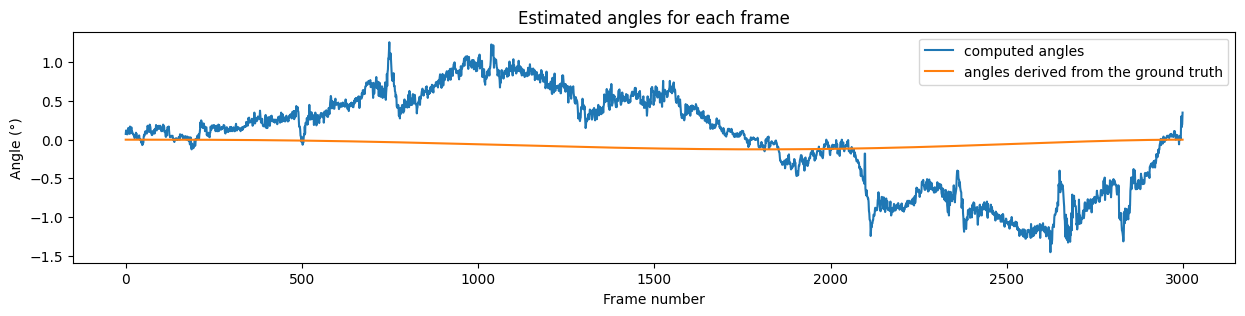

In [76]:
 # Draw computed angles to verify corectness (precision was set to 0.1°)
plt.figure(figsize=(15, 3))
plt.plot(-np.rad2deg(angles), label="computed angles")
plt.plot(np.rad2deg(ground_truth_angles_rad), label="angles derived from the ground truth")
plt.title("Estimated angles for each frame")
plt.xlabel("Frame number")
plt.ylabel("Angle (°)")
plt.legend()
plt.show()

#### [NOTE]: Angle estimate - missing values
There should be a routine which fulfill missing angles. 
This happens especially on spacer grids where lower number of edge pixels are present and/or the lines are shorter.
This is not an issue for synthetic data and we skip this step here.

#### [NOTE]: Precision and frame rotation application
OIO build up can be done without frame rotation. The price for simplification is the loss of photogrammetry precision.

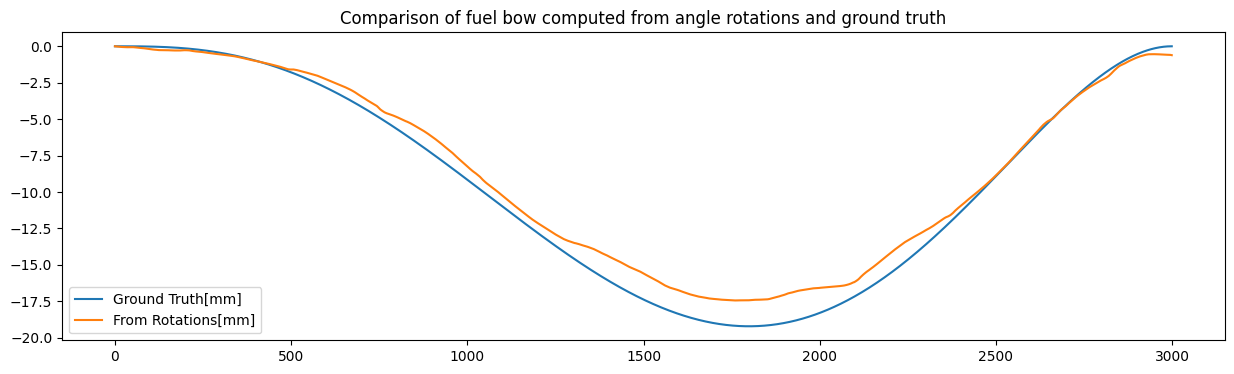

In [77]:
cam_speed_mm = ROD_LENGTH_MM/len(frames)

tans = np.tan(angles)
shifts_from_rot = [-tan * cam_speed_mm for i, tan in enumerate(tans)]
cum_shifts_from_rot = np.cumsum(shifts_from_rot)

px_to_mm = y_shift_of_consecutive_frames_px * cam_speed_mm
# cam_shift_mm
abs_shifts_x = df_shifts['abs_shift_x_mm']

plt.figure(figsize=(15,4))
plt.plot(abs_shifts_x, label ="Ground Truth[mm]")
plt.plot(-cum_shifts_from_rot,label='From Rotations[mm]')
plt.legend()
plt.title("Comparison of fuel bow computed from angle rotations and ground truth")
plt.show()

## Y-axis and camera speed

To precisely register frames we need to know camera speed. 
For the estimation of this speed we use spacer grids (SG) frames, where horizontal edges are present (in principle any object with horizontally oriented edge is suitable for such estimate).

### Y-shift estimate step by step

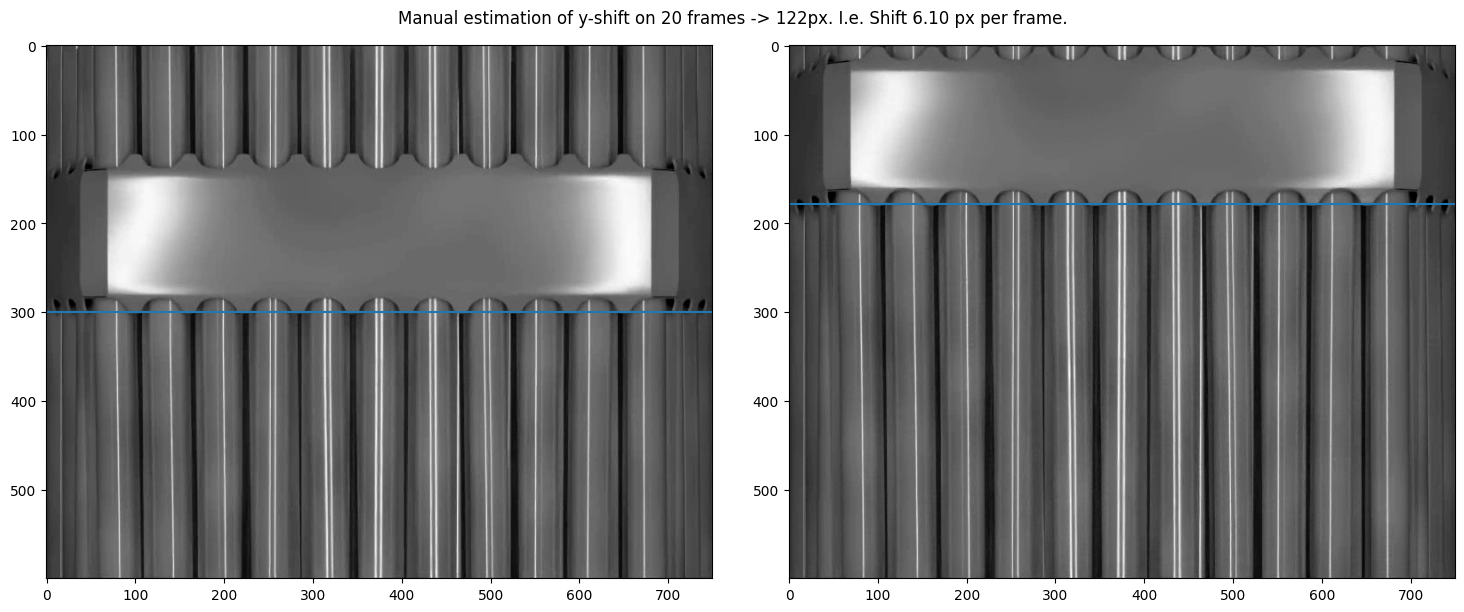

In [72]:
# We choose two frames with a SG

plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 2, 1)


first_frame = spacer_grid_frame_num
# The first one is 20 frames before the second one i.e. 0.8s (with 25fps of the video)
ax.imshow(frames[first_frame],cmap='gray')

# Our SG is in this frame on a row ...
sg_pos_first_frame = 300
plt.axhline(sg_pos_first_frame)
ax = plt.subplot(1, 2, 2)
second_frame = first_frame + 20
ax.imshow(frames[second_frame],cmap='gray')
# 20 frames later the position of the SG is at row ...
sg_pos_second_frame = 178
plt.axhline(sg_pos_second_frame)
plt.suptitle(f"Manual estimation of y-shift on {second_frame - first_frame} frames -> {sg_pos_first_frame - sg_pos_second_frame}px. I.e. Shift {(sg_pos_first_frame - sg_pos_second_frame) / (second_frame - first_frame):.2f} px per frame.")
plt.tight_layout()
plt.show()

In [41]:
# Computed value is used for all frames (we assume that camera speed is pretty much constant)
y_shift_of_consecutive_frames_px = (sg_pos_second_frame - sg_pos_first_frame) / (second_frame - first_frame)

### Y-shift robust and "automatic"

It will be good to make detection automatic.

In [42]:
from scipy.interpolate import RectBivariateSpline

In [79]:
# We introduce the sum of absolute derivatives (SAD)

# This method returns SAD, i.e. 1 number for a frame. 
# If the frame contains a lot of vertically oriented edges (rod parts) the number will be higher than ...
# for a frame with SG without vertical edges ...
def frame_sad(frame):
  return np.sum(np.abs(np.diff(frame, axis=1)))

The core concept is sum of absolute derivatives which we use for detection of SGs in the video

In [80]:
frames_sad = []
for frame in tqdm(frames):
  frames_sad.append(frame_sad(frame))

  0%|          | 0/3000 [00:00<?, ?it/s]

In [81]:
# extremal values corresponds often to some artificial objects.
# Without loosing relevant information, we drop the outliers.
sadmax = np.percentile(frames_sad, 95)
sadmin = np.percentile(frames_sad, 5)
sad_thresholded = np.zeros((len(frames_sad),))
sad_thresholded[np.abs(frames_sad - sadmax) < np.abs(frames_sad - sadmin)] = 1

Let's see how SAD is effective for searching frames in which the (flat) SG is present:

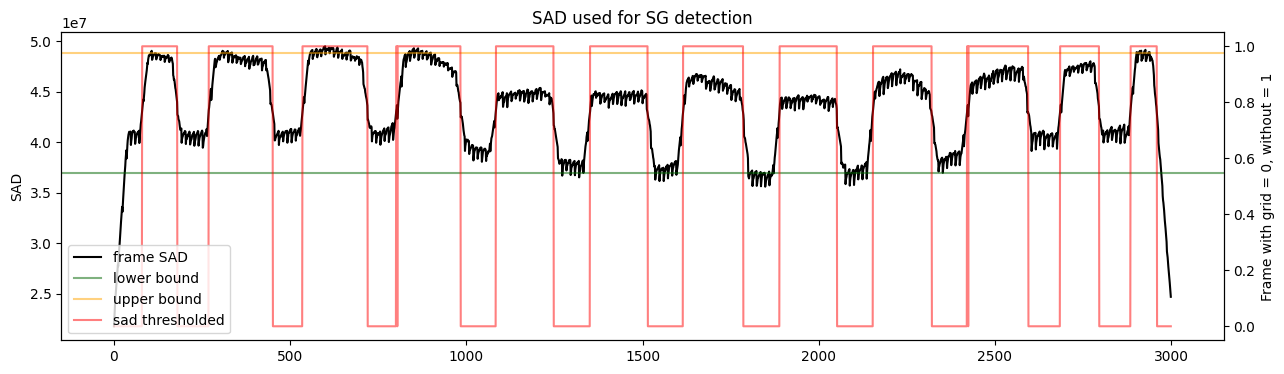

In [82]:
plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(frames_sad, label="frame SAD", color="black")
ax.axhline(sadmin, color="darkgreen", label="lower bound", alpha=.5)
ax.axhline(sadmax, color="orange", label="upper bound", alpha=.5)
ax.set_ylabel("SAD")
ax2 = ax.twinx()
ax2.plot(sad_thresholded, color="red", label="sad thresholded", alpha=0.5)
ax2.set_ylabel("Frame with grid = 0, without = 1")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=3)

plt.title("SAD used for SG detection")
plt.xlabel("Frame number")
plt.show()

From the signal above, we would like to:
1) Create sequences of frames containing the same SG
2) In each of these sequences we compare consecutive frames and find out a value of y_shift which achieves the best registration.
3) Once we know this y_shift for each of our filtered SG containing consecutive frames we derive one speed for whole fuel assembly.

NOTE: In principle the speed can vary, because fuel can be closer or futher from the camera. However, we are able to estimate the speed only on SG. Here, we introduce some averaging error. We can do better for frames with SG, but for intergrid areas other source of information is necessary for correcting the speed.

In [47]:
from speed_estimator import generate_z_axis_from_grids, estimate_shift, extract_grid_start_end_from_is_grid, collect_video_grid_packs

1. thresholding of the signal

In [48]:
# we do not want to extract speed from the beginning and end of the video
# for this reason we use just spacer grids between first and last intergrid areas:

# we find out, where intergrids are
non_grid_frames_sorted_by_id = np.sort(np.where(sad_thresholded==1)[0])
# we took all frames where our thresholded sad gives zero
grid_frames_with_boundaries = np.where(sad_thresholded==0)[0]
# from these frame set we remove first and last sequence of zeroes
grid_frames = grid_frames_with_boundaries[np.logical_and(non_grid_frames_sorted_by_id[-1] > grid_frames_with_boundaries, 
                                                         grid_frames_with_boundaries > non_grid_frames_sorted_by_id[0])]
# Finally, we create an array with {0, 1} values, which denotes frames for further processing
does_frame_contains_grid = np.zeros(sad_thresholded.shape)
does_frame_contains_grid[grid_frames] = 1

2. extraction of sequences suitable for camera speed estimation and speed estimation

In [49]:
# We create "grid packs" (sequence of frames containing the same grid)
grids_start_end, grids = extract_grid_start_end_from_is_grid(does_frame_contains_grid)
grid_packs = collect_video_grid_packs(frames, grids_start_end)

# For each grid pack we compute the frame distance in pixels
grid_speeds_px_per_frame = [estimate_shift(grid_pack) for grid_pack in grid_packs]

3. evaluation of achieved results - estimation of the best camera speed for OIO stitching

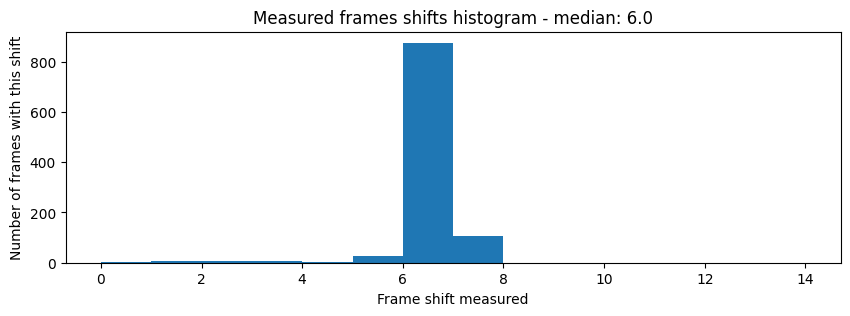

In [50]:
plt.figure(figsize=(10,3))
plt.title(f"Measured frames shifts histogram - median: {np.median([speed for _, _, speeds in grid_speeds_px_per_frame for speed in speeds])}")
plt.hist(np.array([speed for _, _, speeds in grid_speeds_px_per_frame for speed in speeds]), bins=np.arange(15))
plt.xlabel("Frame shift measured")
plt.ylabel("Number of frames with this shift")
plt.show()

In [83]:
# The above code wrapped to produce single table suitable for OIO build up
df, pixels_per_mm_vertical = generate_z_axis_from_grids(does_frame_contains_grid, frames, rod_length_mm=ROD_LENGTH_MM)

In [84]:
df

shift px  z-axis px    z-axis mm
0          6.0        6.0     1.266245
1          6.0       12.0     2.532489
2          6.0       18.0     3.798734
3          6.0       24.0     5.064978
4          6.0       30.0     6.331223
...        ...        ...          ...
2995       6.0    17976.0  3793.668777
2996       6.0    17982.0  3794.935022
2997       6.0    17988.0  3796.201266
2998       6.0    17994.0  3797.467511
2999       6.0    18000.0  3798.733755

[3000 rows x 3 columns]

In [85]:
print(f"Comparison of manual speed estimation {y_shift_of_consecutive_frames_px} and algorithmic approach {df['shift px'].to_numpy()[0]}")

Comparison of manual speed estimation 6.0 and algorithmic approach 6.0


In [86]:
y_shift_of_consecutive_frames_px = df['shift px'].to_numpy()[0]

Plotting of the measurement results...

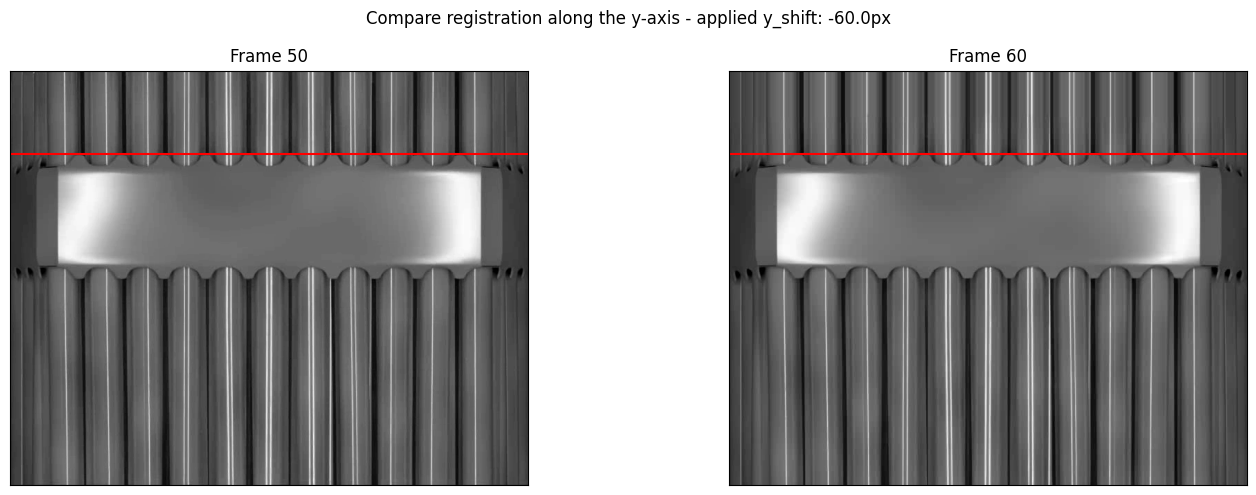

In [87]:
# as a reference frame we use frame with id start_frame + 50
ref_frame_id = start_frame + 50
# for comparison we use frame with id start_frame + 97
compared_frame_id = start_frame + 60 # Up to 47 diff in horizontal shift

plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
ax.set_title(f"Frame {ref_frame_id + start_frame}")
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(frames[ref_frame_id],cmap='gray')
ax.axhline(120, color="red")

ax = plt.subplot(1, 2, 2)
ax.set_title(f"Frame {compared_frame_id + start_frame}")

y_shift = - y_shift_of_consecutive_frames_px * (compared_frame_id - ref_frame_id)

spline = RectBivariateSpline(
    x=np.arange(WIDTH),
    y=np.arange(HEIGHT),
    z=frames[compared_frame_id].T
)

xgrid, ygrid = np.meshgrid(
    np.arange(WIDTH),
    np.arange(y_shift ,y_shift+HEIGHT)
)

ax.imshow(spline(xgrid, ygrid, grid=False), cmap="gray")
ax.axhline(120, color="red")
ax.set_xticks([])
ax.set_yticks([])
plt.suptitle(f"Compare registration along the y-axis - applied y_shift: {y_shift}px")
plt.tight_layout()
plt.show()

## Registration according to the X-axis

In [88]:
from scipy.optimize import minimize_scalar
from tqdm.auto import tqdm

As a metric for evaluation of x-shift ($\Delta x$), we use

$$F(\Delta x, I_k, I_{k+1}) = \Sigma_{x \in \{0, ..., W\}} \left(I_k\left(x, \frac{H}{2}\right) - I_{k+1}\left(x + \Delta x, \frac{H}{2}\right)\right)^2,$$

where

- $I_k$, $I_{k+1}$ denotes function, which for pixel coordinates $[x,y]$ return intensity of that pixel in frame $k$, $k+1$ respectively
- $W$, $H$ is a width (height) of a frame in input video  

This product is maximal, when intensities of $I_{k+1}$ shifted by $\Delta x$ exactly matches intensities in $I_k$ at non-shifted positions.

Shift should be with subpixel precision.

In [133]:
x_shifts = [0]
prev_frame = rotated_frames[0]
row_sads = []
ROW_USED = HEIGHT // 2

for current_frame in tqdm(rotated_frames[1:], total=len(frames)-1, desc="X-shift computation"):
    row_sads.append(np.sum(np.abs(np.diff(prev_frame[ROW_USED, :]))))
    def subpixel_shift_error(x_shift):
        interpolated = np.interp(
            np.arange(x_shift, x_shift + WIDTH),
            np.arange(WIDTH),
            current_frame[int(np.round(ROW_USED - y_shift_of_consecutive_frames_px)), :] / 255.0)

        return np.sum(np.power(prev_frame[ROW_USED, :] / 255.0 - interpolated, 2))

    # We use minimization function to find correct position with subpixel precision
    best_shift = minimize_scalar(
        subpixel_shift_error,
        0,
        bounds=(-1, +1), # We expect small shift along the x-axis (it is in pixels per 0.04s)        
        method='Bounded',
    )
    x_shifts.append(best_shift.x)
    prev_frame = current_frame
row_sads.append(np.sum(np.abs(np.diff(current_frame[ROW_USED, :]))))

X-shift computation:   0%|          | 0/2999 [00:00<?, ?it/s]

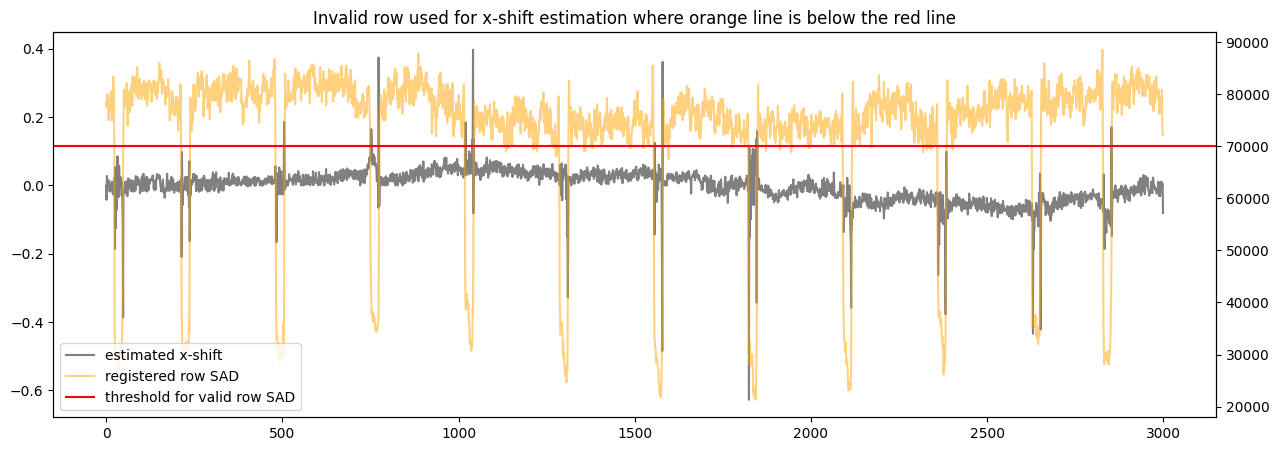

In [134]:
xshift_sad_threshold = 70000

plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.plot(x_shifts, color="gray", label="estimated x-shift")
ax2 = ax.twinx()
ax2.plot(row_sads, color="orange", alpha=.5, label="registered row SAD")
ax2.axhline(xshift_sad_threshold, label="threshold for valid row SAD", color="red")
plt.title("Invalid row used for x-shift estimation where orange line is below the red line")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=3)
plt.show()

In [135]:
# Application of the threshold to measured x-shifts
x_shifts = np.array(x_shifts)
x_shifts[np.array(row_sads) < xshift_sad_threshold] = 0
# Meaning of the x_shift is relevant for OIO as a cummulative sum
x_shifts_cum = np.cumsum(np.array(x_shifts))

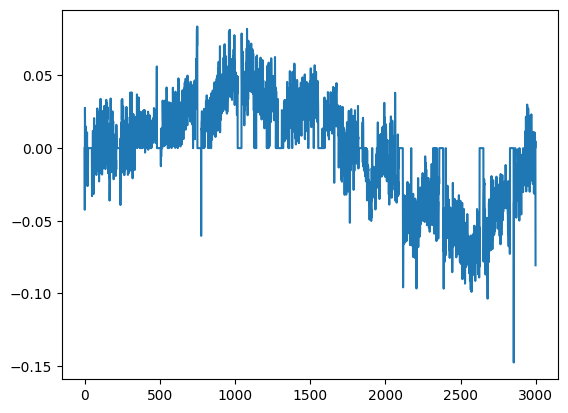

In [136]:
plt.plot(x_shifts)
plt.show()

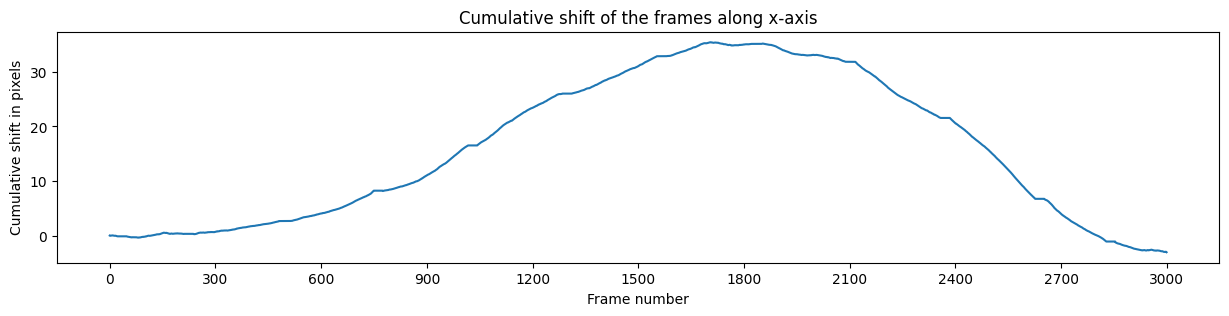

In [137]:
plt.figure(figsize=(15, 3))
plt.title("Cumulative shift of the frames along x-axis")
plt.plot(x_shifts_cum)
plt.xlabel("Frame number")
plt.ylabel("Cumulative shift in pixels")
x_ticks = np.linspace(0, stop_frame-start_frame, 11)
x_labels = np.linspace(0, stop_frame-start_frame, 11,dtype=int)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.show()

## Comparison of x-shift with ground truth

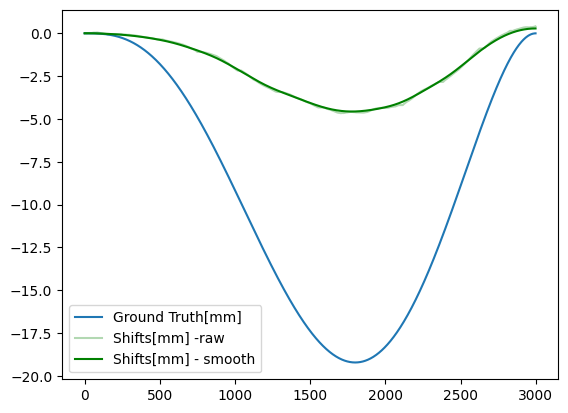

In [158]:
# POZOR, toto dokazuje ze to nefunguje
cam_speed_mm = 3800/3000

px_to_mm = y_shift_of_consecutive_frames_px * cam_speed_mm
# cam_shift_mm
abs_shifts_x = df_shifts['abs_shift_x_mm']
plt.plot(abs_shifts_x, label ="Ground Truth[mm]")
plt.plot(-x_shifts_cum / px_to_mm, label="Shifts[mm] -raw ", alpha=.3, c = 'green')
plt.plot(ndi.gaussian_filter1d(-x_shifts_cum / px_to_mm, 100), c = 'green', label="Shifts[mm] - smooth")
plt.legend()
plt.show()

Check the registration quality on some shifted frames. Visualize the registration output:

In [43]:
# as a reference frame we use frame with id start_frame + 50
ref_frame_id = start_frame + 160
# for comparison we use frame with id start_frame + 97
compared_frame_id = start_frame + 150 # Up to 47 diff in horizontal shift
# in the image we show just this number of lines
compared_frame_height = 100
# linse will be centered around this row
h_center = HEIGHT // 2

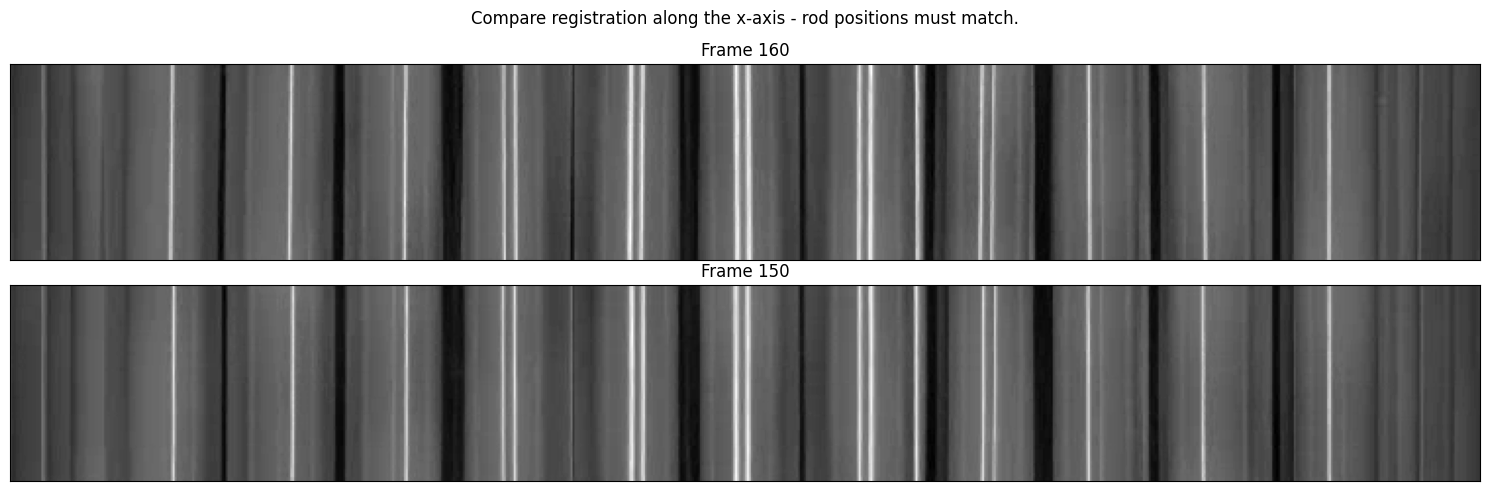

In [44]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1, 1)
ax.set_title(f"Frame {ref_frame_id + start_frame}")
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(frames[ref_frame_id][h_center - compared_frame_height // 2: h_center + compared_frame_height // 2, :],cmap='gray')

ax = plt.subplot(2, 1, 2)
ax.set_title(f"Frame {compared_frame_id + start_frame}")

x_shift = x_shifts_cum[compared_frame_id] - x_shifts_cum[ref_frame_id]
y_shift = np.round(y_shift_of_consecutive_frames_px * (compared_frame_id - ref_frame_id)).astype(int)

spline = RectBivariateSpline(
    x=np.arange(WIDTH),
    y=np.arange(compared_frame_height),
    z=frames[compared_frame_id][
      (h_center + y_shift).astype(int) - compared_frame_height // 2:
      (h_center + y_shift).astype(int) - compared_frame_height // 2 + compared_frame_height, :].T
)

xgrid, ygrid = np.meshgrid(
    np.arange(x_shift, x_shift + WIDTH),
    np.arange(compared_frame_height)
)

ax.imshow(spline(xgrid, ygrid, grid=False), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
plt.suptitle("Compare registration along the x-axis - rod positions must match.")
plt.tight_layout()
plt.show()

Stop here and look at previous image in higher detail ... 

- On the right side you can see that rod reflections are shifted on the bottom image slightly to the left.
- On the left side the situation is the opposite.

How this happen? Whenever there is wrong `x_shift` estimation the reflection shifts will be on both sides the same and the `x_shift` can be computed better. But it is not...

This happen due to a fuel swing. The direction of the swing is here to the camera. Therefore frame no `160` looks little bit zoomed. This is one kind of noise which require more sophisticated approach where next to the `angle`, `y_shift` and `x_shift` also `scale` is estimated. However, often the price is the optimization convergence stability and robustness...

### Bigger context for y-shift estimation

Here is another function which estimates the x-shift. Because it is much more complex it is wrapped into a function file. Take a look if you are interested in more detail. Such approach is necessary for good photogrammetry results.

TLDR:
- the main issue is combination with zoom and perspective tranformation present while fuel is twisted/bowed or FA roates or swings during screening
- in a model you can estimate perspective transformation parameters as well as zoom/x-shift/rotation
- however such an approach is unstable and do not perform well
-> to do a similar thing but more robust way we:
  1. cut three slices of each frame (upper, middle and bottom) a.k.a. triplet
  2. stack slices into 2D matrix
  3. do registration on this 2D matrix

Outcomes:
- Because slices are higher than one pixel (as in our naive approach) the method return more stable results.
- Because we combine upper and bottom slice we somehow compensate twist and reduce effect of swing.

In [164]:
from x_shift_estimator import estimate_x_shifts

y_shifts = np.ones((len(x_shifts), )) * y_shift_of_consecutive_frames_px
x_shifts = estimate_x_shifts(rotated_frames, y_shifts)
x_shifts_cum = np.cumsum(x_shifts)

Shift estimation:   0%|          | 0/2999 [00:00<?, ?it/s]

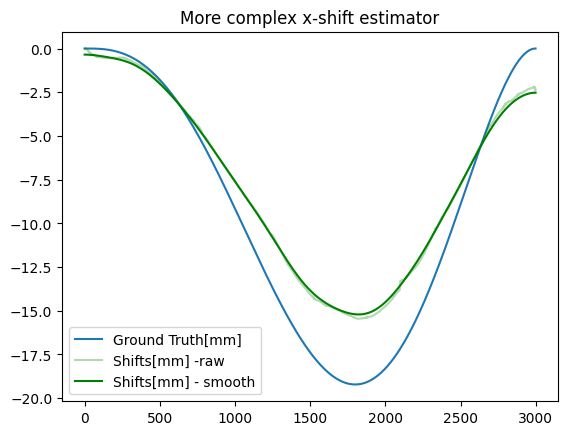

In [165]:
# POZOR, toto dokazuje ze to nefunguje
cam_speed_mm = 3800/3000

# cam_shift_mm
plt.plot(abs_shifts_x, label ="Ground Truth[mm]")
plt.plot(x_shifts_cum / px_to_mm,label="Shifts[mm] -raw ", alpha=.3, c = 'green')
plt.plot(ndi.gaussian_filter1d(x_shifts_cum / px_to_mm, 100), c = 'green', label="Shifts[mm] - smooth")
plt.legend()
plt.title("More complex x-shift estimator")
plt.show()

## One image overview construction

In previous part, we computed frame:
- rotation angles $\alpha$
- y-shift $\Delta y$
- x-shift $\Delta x$

From these values we are able to extract pixels from each frame which together build up the One Image Overview

In [166]:
from oio_stitching import stitch_frame_sequence

In [167]:
y_shifts = np.ones((len(x_shifts), )) * y_shift_of_consecutive_frames_px

In [168]:
oio = stitch_frame_sequence(frames, angles, y_shifts, x_shifts_cum)

Building OIO:   0%|          | 0/3000 [00:00<?, ?it/s]

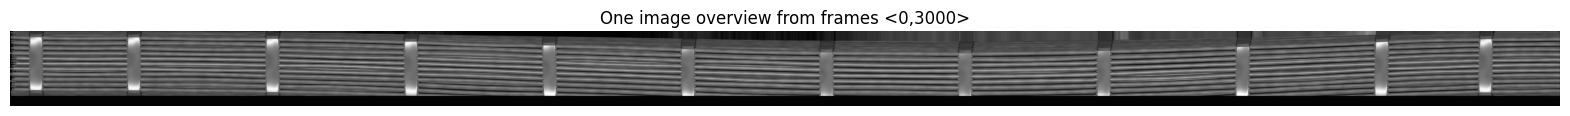

In [169]:
plt.figure(figsize=(20,4))
plt.title(f"One image overview from frames <{start_frame},{stop_frame}>")
plt.imshow(oio.T,cmap='gray')
plt.axis('off')
plt.show()


## Real world challenges

- Fuel swings on a rod

 - sideways swings are corrected using registration

 - back and forth is harder to solve

- Light/Reflection

 - some parts of fuel (usually bottom part) are poorly illuminated -> impacts all the steps

 - sharp reflections